In [1]:
## In this code we are shortly following those steps:
## 1)reading 16 bit grayscale image from manually specified datapath(we could also read 8 bit image)
## 2)by considering the grayscale values, drawing the circles of bright side of the image and calculate the center and radius
## 3)specifically read the grayscale values and calculate the average of it in circular area that we get in step 2
## 4)comparing two images acc. to average values 

from matplotlib.ticker import LogLocator
from decimal import Decimal, getcontext

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from datetime import datetime
date=datetime.today().strftime('%d-%m-%Y')

from matplotlib import image 
from PIL import Image
import cv2

#In this part, we are reading the first excel file
dataMmass = pd.ExcelFile('MolarMassList_corrected.xlsx')
data1=pd.read_excel(dataMmass,'Tabelle1')
Comp=data1['Compound']
Mmass=data1['Molar Mass g/mol']
data2=pd.read_excel(dataMmass,'Tabelle2')
t=data2['t_interval']
temp=data2['T_insitu[°C]']
pr=data2['pressure_with_offset[bar]']


#In this part, we are reading the second excel file
dataDBase=pd.ExcelFile('db3_new.xlsx')
data3=pd.read_excel(dataDBase,'Tabelle1')
Comp2=data3['Compound']
CompPe=data3['Photon Energy (KeV)']
CompAtt=data3['Linear Attenuatiion Coefficient (Conc_0.50)']


records_array = np.array(Comp)#ordering collected data to use easily
idx_sort = np.argsort(records_array)# creates an array of indices, sorted by unique element
sorted_records_array = records_array[idx_sort]#sorts records array so all unique elements are together
vals_c, idx_start_c, count_c = np.unique(sorted_records_array, return_counts=True, return_index=True)

records_array = np.array(Comp2)#ordering collected data to use easily
idx_sort = np.argsort(records_array)# creates an array of indices, sorted by unique element
sorted_records_array = records_array[idx_sort]#sorts records array so all unique elements are together
vals_c2, idx_start_c2, count_c2 = np.unique(sorted_records_array, return_counts=True, return_index=True)

def get_dpi(image_path):
    with Image.open(image_path) as img:
        dpi = img.info.get('dpi')
        return dpi

In [2]:
dpaths=["D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_10-24-24_100kV_9mAs_5x.tif", 
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_10-38-13_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_10-51-56_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_11-05-39_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_11-19-21_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_11-33-04_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_11-46-46_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_12-00-28_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_12-14-11_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_12-27-53_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_12-41-35_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_12-55-16_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_13-08-58_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_13-22-38_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_13-36-19_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_13-50-01_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_14-03-42_100kV_9mAs_5x.tif",
        "D:\\MNandwana_Project\\17.03.25\\Copy\\gscale_xray_images\\L048_2016-07-18_14-17-23_100kV_9mAs_5x.tif",]

dpi_value=[0]*len(dpaths)
image=[0]*len(dpaths)
avg_image=[0]*len(dpaths)
for i in range(0,len(dpaths)):
    image[i]=cv2.imread(dpaths[i], cv2.IMREAD_UNCHANGED)
    avg_image[i]=np.mean(image[i])
    avg_image[i]=math.ceil(avg_image[i])
    cv2.imwrite('Original image%s %s .tif'%(i+1,date), image[i].astype(np.uint16))# Save or display the image 16 bit
    dpi_value[i] = get_dpi(dpaths[i])
    #cv2.imshow('Image', image[i])#name of the images must be same with next line(Image1 in our case)
    #cv2.moveWindow('Image', 40, 30) ##locating the image on windows# 
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()  # these area could be activate if you want to see the readed images one by one
   
    
    if image[i] is None:
        print("Error: Could not open or find the image%s"%(i+1))
    else:
        print("Image%s loaded successfully"%(i+1))
        print("Image%s pixels in (y,x) format:"%(i+1), image[i].shape)
        print("Image%s data type:"%(i+1), image[i].dtype)
        print("Image%s DPI value:"%(i+1), dpi_value[i])
        print("Image%s Average Gscale Values for Whole Image is:"%(i+1),avg_image[i])
        print("\n")

#list(image[0])

Image1 loaded successfully
Image1 pixels in (y,x) format: (1640, 1250)
Image1 data type: uint16
Image1 DPI value: (1, 1)
Image1 Average Gscale Values for Whole Image is: 26240


Image2 loaded successfully
Image2 pixels in (y,x) format: (1640, 1250)
Image2 data type: uint16
Image2 DPI value: (1, 1)
Image2 Average Gscale Values for Whole Image is: 26210


Image3 loaded successfully
Image3 pixels in (y,x) format: (1640, 1250)
Image3 data type: uint16
Image3 DPI value: (1, 1)
Image3 Average Gscale Values for Whole Image is: 26242


Image4 loaded successfully
Image4 pixels in (y,x) format: (1640, 1250)
Image4 data type: uint16
Image4 DPI value: (1, 1)
Image4 Average Gscale Values for Whole Image is: 26239


Image5 loaded successfully
Image5 pixels in (y,x) format: (1640, 1250)
Image5 data type: uint16
Image5 DPI value: (1, 1)
Image5 Average Gscale Values for Whole Image is: 26267


Image6 loaded successfully
Image6 pixels in (y,x) format: (1640, 1250)
Image6 data type: uint16
Image6 DPI val

In [28]:
#image=[0]*len(dpaths)
image8bit=[0]*len(dpaths)
image_circular=[0]*len(dpaths)
avg_rec=[0]*len(dpaths)
#avg_rec_dark=[0]*len(dpaths)
#avg_rec_diff=[0]*len(dpaths)
avg_circle=[0]*len(dpaths)
rec=[0]*len(dpaths)
clipped_rec=[0]*len(dpaths)
#clipped_rec_dark=[0]*len(dpaths)

#cnt_circ_dark=[0][0]*len(dpaths)
cnt_circ=[0]*len(dpaths)
radius_circ=[0]*len(dpaths)
text=[0]*len(dpaths)
text2=[0]*len(dpaths)
position1=[0]*len(dpaths)
position2=[0]*len(dpaths)

I0=[0]*len(dpaths)
I0temp=[0]*len(dpaths)
I0 = max((v for v in avg_rec if v > 0), default=1)


x1=[0]*len(dpaths)
y1=[0]*len(dpaths)
#x1_cnt_dark=[0]*len(dpaths)
#y1_cnt_dark=[0]*len(dpaths)

cGaOnly=[0]*len(dpaths)
ct=[0]*len(dpaths)
cnt_hline=[0]*len(dpaths)
hline=[0]*len(dpaths)

avg_hline=[0]*len(dpaths)
resized_clip=[0]*len(dpaths)
resized_clip2=[0]*len(dpaths)
#whole_avg=[0]*len(dpaths)

ymin=50  #offset values for drawing the rectrangle to be added to center of circle
ymax=50
xmin=-90
xmax=-130
#xmin_dark=-100
#xmax_dark=-200

Eph=51
stepsize=100
I0max=65535
I0 = I0max

#avg_rec[14]=11730#avg_rec[14] - saskia"s image



In [23]:
#############################################################################################################################

 #define a function that gets molar mass and att coef. and image to calculates the I1 values for different compounds
def funct_cnst_keV(Att,Mmass,I0,stepsize):
    c=np.logspace(-6,0,num=stepsize)
    #c=np.linspace(0.000001,1,num=stepsize)
    x1=[0]*stepsize
    x2=[0]*stepsize
    x3=[0]*stepsize
    gscale=[0]*stepsize
    for i in range(0,stepsize):
        x1[i]=(-Att*Mmass*2.79*0.001)*c[i]
        
        getcontext().prec = 20
        x2[i] = Decimal(x1[i]) 
        x3[i] = np.exp(x2[i])
        gscale[i]=I0*x3[i]
     
    return gscale,c

#############################################################################################################################

#define a function that gets molar mass and att coef. and image to calculates the I1 values for different compounds
def funct_cnst_keV_v2(Att,Mmass,I0,I):
    c=[0]*1
    x1=[0]*1
    x2=[0]*1
    x3=[0]*1
    ratio=I/I0
    d=-Att*Mmass*2.79*0.001
    f=math.log(ratio)/d
    return f
 
    
    
#############################################################################################################################


 #This Function Calculates a Concentration Value for Speficific I/I0 Ratio
    
def funct_cnst_keV_v3(Compound,E_ph,I0,I,stepsize):
    x4=[0]*stepsize #MolarMass
    x5=[0]*stepsize #AttConstant
    ratio=I/I0
    c=np.logspace(-6,0,num=stepsize)
    #c=np.linspace(0.000001,1,num=stepsize)
    for i in range(0,len(vals_c2)):
        if Compound==vals_c2[i]:
            x4[i]=Mmass[i]
            if i<len(vals_c2)-1:
                for j in range(idx_start_c2[i],idx_start_c2[i+1]):
                    if E_ph==CompPe[j]:
                        x5[i]=CompAtt[j]
                        
            elif i==len(vals_c2)-1:
                for j in range(idx_start_c2[i],len(Comp2)):
                    if E_ph==CompPe[j]:
                        x5[i]=CompAtt[j]  
    
    x4=[i for i in x4 if i != 0]
    x5=[i for i in x5 if i != 0]  
    d=-x5[0]*x4[0]*2.79*0.001
    f=math.log(ratio)/d 
    return f
#############################################################################################################################

 #define a function that gets molar mass and att coef. and image to calculates the I1 values for different compounds
def funct_cnst_keV_v4(Compound,E_ph,I0,stepsize):
    c=np.logspace(-6,1,num=stepsize)
    x4=[0]*stepsize #MolarMass
    x5=[0]*stepsize #AttConstant
    for i in range(0,len(vals_c2)):
        if Compound==vals_c2[i]:
            x4[i]=Mmass[i]
            if i<len(vals_c2)-1:
                for j in range(idx_start_c2[i],idx_start_c2[i+1]):
                    if E_ph==CompPe[j]:
                        x5[i]=CompAtt[j]
                        
            elif i==len(vals_c2)-1:
                for j in range(idx_start_c2[i],len(Comp2)):
                    if E_ph==CompPe[j]:
                        x5[i]=CompAtt[j]  
    
    
    x4=[i for i in x4 if i != 0]
    x5=[i for i in x5 if i != 0] 
    #c=np.linspace(0.000001,1,num=stepsize)
    x1=[0]*stepsize
    x2=[0]*stepsize
    x3=[0]*stepsize
    gscale=[0]*stepsize
    for i in range(0,stepsize):
        x1[i]=(-x5[0]*x4[0]*2.79*0.001)*c[i]
        
        getcontext().prec = 20
        x2[i] = Decimal(x1[i]) 
        x3[i] = np.exp(x2[i])
        gscale[i]=I0*x3[i]
     
    return gscale,c


#############################################################################################################################

#define a function that gets name of compound image to calculates the I1 for different att coef. values
def funct_Eph_values_finder_in_specific_conc(Compound,Concentration,I0):
    x1=[0]*len(Comp2)##
    x2=[0]*len(vals_c2)##Mmass
     
    for i in range(0,len(vals_c2)):        
        if Compound==vals_c2[i]:
            x2[i]=Mmass[i]          
            if i<len(vals_c2)-1:
                for i in range(idx_start_c2[i],idx_start_c2[i+1]):
                    x1[i]=CompPe[i]
            elif i==len(vals_c2)-1:
                for i in range(idx_start_c2[i],len(Comp2)):
                    x1[i]=CompPe[i]
                 
    x1=[i for i in x1 if i != 0]
    x2=[i for i in x2 if i != 0]
    gscale=[0]*len(x1) 
    x3=[0]*len(x1)
    x4=[0]*len(x1)
    x5=[0]*len(x1)
    
    for i in range(0,len(x1)):
        x3[i]=(-x1[i]*Concentration*0.001*x2[0]*2.79)
        getcontext().prec = 20
        x4[i] = Decimal(x3[i])
        x5[i] = np.exp(x4[i])
        gscale[i]=x5[i]*I0
    gscale=[i for i in gscale if i != 0]     
    return gscale,x1

################################################################################################################################


In [24]:
def cnt_radius_finder(image): #getting center and radius
# Normalize the image to 8-bit for better processing
    image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply a Gaussian blur to reduce noise and improve circle detection
    blurred_image = cv2.GaussianBlur(image_8bit, (9,9), 2)

# Use Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=150,
                           param1=100, param2=30, minRadius=100, maxRadius=600) #default values minDist=20 maxRadius=0 param1=50
# Ensure at least some circles were found
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])  # x, y coordinates of the center
            radius = i[2]  # radius of the circle

        # Draw the circle in the output image
            cv2.circle(image_8bit, center, radius, (255, 0, 0), 2)
        # Draw the center of the circle
            cv2.circle(image_8bit, center, 2, (255,0, 0), 3)

    # Display the result
    #cv2.imshow('Detected Circles', image_8bit)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    else:
        print("No circles were observed")
        center=(0,0)
        radius = 0
    

    ###############original image 1 and image 2 with circles#######
    cv2.circle(image_8bit, center, radius, (255, 255, 0), 2)  ##plot circle and center
    cv2.circle(image_8bit, center, 2, (255, 255, 0), 3)
    #cv2.imshow('Detected Circles',image_8bit)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    return center,radius,image_8bit

for i in range(0,len(dpaths)):
    image[i]=cv2.imread(dpaths[i], cv2.IMREAD_UNCHANGED)
    rec[i]=image[i]
    cnt_circ[i],radius_circ[i],image8bit[i]=cnt_radius_finder(rec[i])
    clipped_rec[i]=[]
    x1[i]=cnt_circ[i][0]
    y1[i]=cnt_circ[i][1]
    avg_image[i]=np.mean(image[i])
    if not np.isnan(avg_image[i]) and avg_image[i] is not None and np.isfinite(avg_image[i]):
        avg_image[i]=math.ceil(float(avg_image[i]))
    else:
        avg_image[i]=0
    #x1_cnt_dark[i]=x1[i]-3*radius_circ[i]
   # y1_cnt_dark[i]=y1[i]
    cnt_hline[i]=cnt_circ[i][1]
    hline[i]=image[i][cnt_hline[i]]
    # Convert numpy.uint16 to Python int for safe arithmetic with negative values
    y1_int = int(y1[i])
    x1_int = int(x1[i])
   # y1_cnt_dark_int = int(y1_cnt_dark[i])
    #x1_cnt_dark_int = int(x1_cnt_dark[i])

    # Ensure all indices are Python ints to avoid OverflowError
    # Use Python int for all arithmetic, and check bounds to avoid negative indices
    y_start = y1_int - ymin
    y_end = y1_int + ymax
    x_start = x1_int - xmin
    x_end = x1_int - xmax

    #y_dark_start = y1_cnt_dark_int - ymin
    #y_dark_end = y1_cnt_dark_int + ymax
    #x_dark_start = x1_cnt_dark_int + xmin_dark
    #x_dark_end = x1_cnt_dark_int - xmax_dark

    # Clip indices to valid range
    y_start = max(0, y_start)
    y_end = min(rec[i].shape[0], y_end)
    x_start = max(0, x_start)
    x_end = min(rec[i].shape[1], x_end)

    #y_dark_start = max(0, y_dark_start)
   # y_dark_end = min(rec[i].shape[0], y_dark_end)
    #x_dark_start = max(0, x_dark_start)
    #x_dark_end = min(rec[i].shape[1], x_dark_end)

    clipped_rec[i] = rec[i][y_start:y_end, x_start:x_end]
    #clipped_rec_dark[i] = rec[i][y_dark_start:y_dark_end, x_dark_start:x_dark_end]
    
    # Ensure all coordinates are Python ints to avoid OverflowError
    cv2.rectangle(rec[i], (int(x1[i])-int(xmin), int(y1[i])-int(ymin)), (int(x1[i])-int(xmax), int(y1[i])+int(ymax)), 254, 2) #rec
    #cv2.rectangle(rec[i], (int(x1_cnt_dark[i])+int(xmin_dark), int(y1_cnt_dark[i])-int(ymin)), (int(x1_cnt_dark[i])-int(xmax_dark), int(y1_cnt_dark[i])+int(ymax)), 65534, 2) #rec in dark
    cv2.imwrite('Rectangular Area for image%s %s.tif'%(i+1,date), rec[i].astype(np.uint16))
    
    # Ensure the region to be resized is valid
    if y1[i] - 300 >= 0 and y1[i] + 300 <= rec[i].shape[0] and x1[i] - 300 >= 0 and x1[i] + 300 <= rec[i].shape[1]:
        resized_clip[i] = rec[i][y1[i]-300:y1[i]+300, x1[i]-300:x1[i]+300]
        #resized_clip2[i] = cv2.resize(resized_clip[i], (500, 500))
        #cv2.imwrite('Zoomed Rectangular Area for image%s %s.tif' % (i+1, date), resized_clip2[i].astype(np.uint16)) #this one saves directly inside of rectangle
    else:
        resized_clip[i] = []
        #resized_clip2[i] = []
        
    avg_rec[i] = np.mean(clipped_rec[i])
    if np.isnan(avg_rec[i]) or np.array_equal(clipped_rec[i], []):
        avg_rec[i] = 0
    else:
        avg_rec[i] = float(avg_rec[i])
    
   # avg_rec_dark[i] = np.mean(clipped_rec_dark[i])
    #if np.isnan(avg_rec_dark[i]) or np.array_equal(clipped_rec_dark[i], []) or not np.isfinite(avg_rec_dark[i]):
       # avg_rec_dark[i] = 0  # Handle NaN, infinite, or invalid values by assigning a default value
   # else:
       # try:
           # avg_rec_dark[i] = math.ceil(float(avg_rec_dark[i]))  # Ensure floating-point conversion before ceil
       # except (ValueError, TypeError):
           # avg_rec_dark[i] = 0
    avg_hline[i]=np.mean(hline[i])
    if not np.isnan(avg_hline[i]) and avg_hline[i] is not None and np.isfinite(avg_hline[i]):
        avg_hline[i]=math.ceil(float(avg_hline[i]))
    else:
        avg_hline[i]=0
    
    avg_hline[i]=np.mean(hline[i])
    avg_hline[i]=math.ceil(avg_hline[i])
    
    #if temp[i]>132.45 and pr[i]>111.5 and avg_rec_diff[i] > 0:
        #I0temp[i]=avg_rec_diff[i]
    
    cv2.circle(image[i], cnt_circ[i], radius_circ[i], (155, 155, 155), 2)  ##plot circle and center for originalk image1
    cv2.circle(image[i], cnt_circ[i], 2, (155, 155, 155), 3)
    text[i] = "Image Calculated center:%s"%str(cnt_circ[i])
    text2[i] = "Image Calculated radius:%s"%str(radius_circ[i])

#text3 = "Image2 Calculated center:%s"%str(c2)
#text4 = "Image2 Calculated radius:%s"%str(r2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    position1[i] = (50, 50)
    position2[i] = (50, 80)
    font_scale = 1
    font_color = (155, 155, 155)
    thickness = 2

#####Writing center and radius values on the screenshot (8 bit version) ################
    cv2.putText(image8bit[i], text[i], position1[i], font, font_scale, font_color, thickness, cv2.LINE_AA)
    cv2.putText(image8bit[i], text2[i], position2[i], font, font_scale, font_color, thickness, cv2.LINE_AA)
#cv2.putText(img1_8bit, text2, position2, font, font_scale, font_color, thickness, cv2.LINE_AA)
    cv2.imwrite('Scanned_Circular_Area for image%s %s.jpg'%(i+1,date), image8bit[i].astype(np.uint16))# Save or display the image 16 bit but 96 dpi!!!
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print('Image%s Center values in (y,x) form:%s - Radius: %s'%(i+1,cnt_circ[i],radius_circ[i]))
##print(c2,r2,'in (y,x) and radius form')

try:
    I0 = next(x for x in I0temp if x != 0)  # try to find first non-zero element
except StopIteration:
    print("Warning: No non-zero values found in I0temp. Using default value.")
    I0 = 1  # Set a default value or handle this case according to your needs

for i in range(0,len(dpaths)):
    #if avg_rec_diff[i] > 0:  # Only calculate if the value is positive
        #try:
            #ct[i]=funct_cnst_keV_v3('GaN',Eph,I0,avg_rec_diff[i],stepsize)
            #cGaOnly[i]=funct_cnst_keV_v2(2.912,69.7230,I0,avg_rec_diff[i])
        #except ValueError:
           # ct[i] = 0  # Set default value if calculation fails
           # cGaOnly[i] = 0
   # else:
        ct[i] = 0
        cGaOnly[i] = 0


Image1 Center values in (y,x) form:(np.uint16(795), np.uint16(787)) - Radius: 172
Image2 Center values in (y,x) form:(np.uint16(784), np.uint16(788)) - Radius: 170
Image3 Center values in (y,x) form:(np.uint16(783), np.uint16(787)) - Radius: 173
Image4 Center values in (y,x) form:(np.uint16(791), np.uint16(782)) - Radius: 176
Image5 Center values in (y,x) form:(np.uint16(790), np.uint16(784)) - Radius: 172
Image6 Center values in (y,x) form:(np.uint16(793), np.uint16(779)) - Radius: 175
Image7 Center values in (y,x) form:(np.uint16(787), np.uint16(784)) - Radius: 171
Image8 Center values in (y,x) form:(np.uint16(790), np.uint16(783)) - Radius: 170
Image9 Center values in (y,x) form:(np.uint16(788), np.uint16(778)) - Radius: 171
Image10 Center values in (y,x) form:(np.uint16(793), np.uint16(769)) - Radius: 171
Image11 Center values in (y,x) form:(np.uint16(791), np.uint16(765)) - Radius: 176
Image12 Center values in (y,x) form:(np.uint16(790), np.uint16(758)) - Radius: 176
Image13 Cente

In [25]:
#def get_grayscale_values_in_circle(image_path, center, radius):
def get_grayscale_values_in_circle(image,center, radius):
    # Get the dimensions of the image

    height, width = image.shape

    # Create a list to store grayscale values
    grayscale_values = []
    
    # Iterate over the angle to get points on the circle
    for angle in range(0, 360):
        theta = np.radians(angle)
        x = int(center[0] + radius * np.cos(theta))
        y = int(center[1] + radius * np.sin(theta))
        
        # Check if the point is within the image boundaries
        if 0 <= x < width and 0 <= y < height:
            grayscale_values.append(image[y, x])
    
    return grayscale_values
for i in range(0,len(dpaths)):
    image_circular[i] = get_grayscale_values_in_circle(image[i],cnt_circ[i],radius_circ[i])
    avg_circle[i]=np.mean(image_circular[i])
    avg_circle[i]=math.ceil(avg_circle[i])


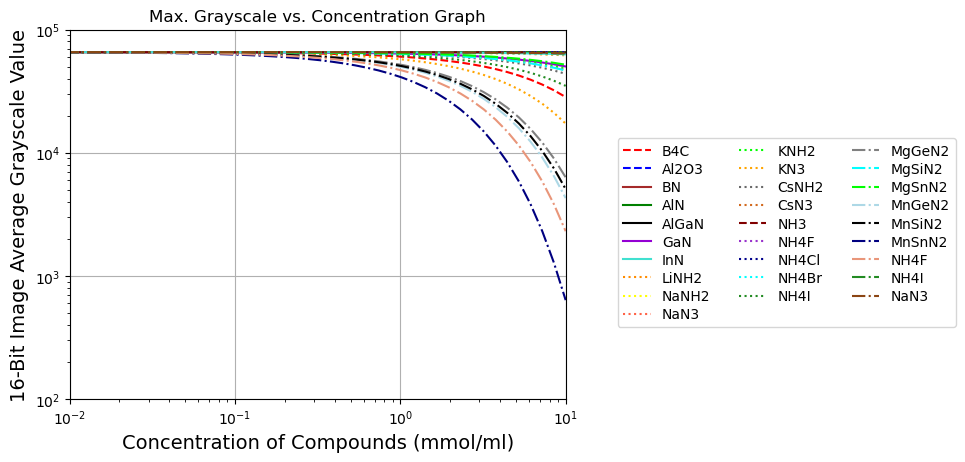

In [26]:
maxAl2O3,maxcAl2O3=funct_cnst_keV_v4('Al2O3',Eph,I0max,stepsize)              
maxAlGaN,maxcAlGaN=funct_cnst_keV_v4('AlGaN',Eph,I0max,stepsize)            
maxAlN,maxcAlN=funct_cnst_keV_v4('AlN',Eph,I0max,stepsize)         
maxB4C,maxcB4C=funct_cnst_keV_v4('B4C',Eph,I0max,stepsize)         
maxBN,maxcBN=funct_cnst_keV_v4('BN',Eph,I0max,stepsize)           
maxCsN3,maxcCsN3=funct_cnst_keV_v4('CsN3',Eph,I0max,stepsize)           
maxCsNH2,maxcCsNH2=funct_cnst_keV_v4('CsNH2',Eph,I0max,stepsize)            
maxGaN,maxcGaN=funct_cnst_keV_v4('GaN',Eph,I0max,stepsize)           
maxInN,maxcInN=funct_cnst_keV_v4('InN',Eph,I0max,stepsize)            
maxKN3,maxcKN3=funct_cnst_keV_v4('KN3',Eph,I0max,stepsize)          
maxKNH2,maxcKNH2=funct_cnst_keV_v4('KNH2',Eph,I0max,stepsize)            
maxLiNH2,maxcLiNH2=funct_cnst_keV_v4('LiNH2',Eph,I0max,stepsize)         
maxMgGeN2,maxcMgGeN2=funct_cnst_keV_v4('MgGeN2',Eph,I0max,stepsize)         
maxMgSiN2,maxcMgSiN2=funct_cnst_keV_v4('MgSiN2',Eph,I0max,stepsize)         
maxMgSnN2,maxcMgSnN2=funct_cnst_keV_v4('MgSnN2',Eph,I0max,stepsize)         
maxMnGeN2,maxcMnGeN2=funct_cnst_keV_v4('MnGeN2',Eph,I0max,stepsize)         
maxMnSiN2,maxcMnSiN2=funct_cnst_keV_v4('MnSiN2',Eph,I0max,stepsize)         
maxMnSnN2,maxcMnSnN2=funct_cnst_keV_v4('MnSnN2',Eph,I0max,stepsize) 
maxNH3,maxcNH3=funct_cnst_keV_v4('NH3',Eph,I0max,stepsize)         
maxNH4Br,maxcNH4Br=funct_cnst_keV_v4('NH4Br',Eph,I0max,stepsize)         
maxNH4Cl,maxcNH4Cl=funct_cnst_keV_v4('NH4Cl',Eph,I0max,stepsize)         
maxNH4F,maxcNH4F=funct_cnst_keV_v4('NH4F',Eph,I0max,stepsize)         
maxNH4I,maxcNH4I=funct_cnst_keV_v4('NH4I',Eph,I0max,stepsize)           #if you wanna add new compound to the excel, 
maxNaN3,maxcNaN3=funct_cnst_keV_v4('NaN3',Eph,I0max,stepsize)           #you also need to add here and the next cell
maxNaNH2,maxcNaNH2=funct_cnst_keV_v4('NaNH2',Eph,I0max,stepsize)          
maxZnGeN2,maxcZnGeN2=funct_cnst_keV_v4('ZnGeN2',Eph,I0max,stepsize)         
maxZnSiN2,maxcZnSiN2=funct_cnst_keV_v4('ZnSiN2',Eph,I0max,stepsize)
maxZnSnN2,maxcZnSnN2=funct_cnst_keV_v4('ZnSnN2',Eph,I0max,stepsize)       



fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(np.arange(0,1.1,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
#ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
#numberofpoints=10
plt.title("Max. Grayscale vs. Concentration Graph") 
#plt.axvline(x=0.13, color='k',linestyle='dotted')

 #if you wanna add new compound to the excel you also need to add here and the previous cell


#window materials
plt.plot(maxcB4C,maxB4C,color='red',linestyle='dashed',label='%s'%(vals_c2[3]))
plt.plot(maxcAl2O3,maxAl2O3,color='blue',linestyle='dashed',label='%s'%(vals_c2[0])) 

# III-N
plt.plot(maxcBN,maxBN,color='brown',linestyle='solid',label='%s'%(vals_c2[4]))
plt.plot(maxcAlN,maxAlN,color='green',linestyle='solid',label='%s'%(vals_c2[2]))
plt.plot(maxcAlGaN,maxAlGaN,color='black',linestyle='solid',label='%s'%(vals_c2[1]))
plt.plot(maxcGaN,maxGaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.plot(maxcInN,maxInN,color='turquoise',linestyle='solid',label='%s'%(vals_c2[8]))

#basic mineralizers
plt.plot(maxcLiNH2,maxLiNH2,color='darkorange',linestyle='dotted',label='%s'%(vals_c2[11])) 
plt.plot(maxcNaNH2,maxNaNH2,color='yellow',linestyle='dotted',label='%s'%(vals_c2[24]))
plt.plot(maxcNaN3,maxNaN3,color='tomato',linestyle='dotted',label='%s'%(vals_c2[23])) 
plt.plot(maxcKNH2,maxKNH2,color='lime',linestyle='dotted',label='%s'%(vals_c2[10]))
plt.plot(maxcKN3,maxKN3,color='orange',linestyle='dotted',label='%s'%(vals_c2[9]))
plt.plot(maxcCsNH2,maxCsNH2,color='dimgray',linestyle='dotted',label='%s'%(vals_c2[6]))
plt.plot(maxcCsN3,maxCsN3,color='chocolate',linestyle='dotted',label='%s'%(vals_c2[5]))

#solvent
plt.plot(maxcNH3,maxNH3,color='maroon',linestyle='dashed',label='%s'%(vals_c2[18]))

#acidic mineralizes
plt.plot(maxcNH4F,maxNH4F,color='darkorchid',linestyle='dotted',label='%s'%(vals_c2[21]))
plt.plot(maxcNH4Cl,maxNH4Cl,color='darkblue',linestyle='dotted',label='%s'%(vals_c2[20]))
plt.plot(maxcNH4Br,maxNH4Br,color='cyan',linestyle='dotted',label='%s'%(vals_c2[19]))
plt.plot(maxcNH4I,maxNH4I,color='forestgreen',linestyle='dotted',label='%s'%(vals_c2[22]))      

# II-IV-N2
plt.plot(maxcMgGeN2,maxMgGeN2,color='gray',linestyle='dashdot',label='%s'%(vals_c2[12]))
plt.plot(maxcMgSiN2,maxMgSiN2,color='aqua',linestyle='dashdot',label='%s'%(vals_c2[13]))
plt.plot(maxcMgSnN2,maxMgSnN2,color='lime',linestyle='dashdot',label='%s'%(vals_c2[14]))
plt.plot(maxcMnGeN2,maxMnGeN2,color='lightblue',linestyle='dashdot',label='%s'%(vals_c2[15]))
plt.plot(maxcMnSiN2,maxMnSiN2,color='k',linestyle='dashdot',label='%s'%(vals_c2[16]))
plt.plot(maxcMnSnN2,maxMnSnN2,color='navy',linestyle='dashdot',label='%s'%(vals_c2[17]))
plt.plot(maxcZnGeN2,maxZnGeN2,color='darksalmon',linestyle='dashdot',label='%s'%(vals_c2[21]))
plt.plot(maxcZnSiN2,maxZnSiN2,color='forestgreen',linestyle='dashdot',label='%s'%(vals_c2[22]))
plt.plot(maxcZnSnN2,maxZnSnN2,color='saddlebrown',linestyle='dashdot',label='%s'%(vals_c2[23]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.8, 0.45),labelspacing = 0.3,ncol=3)
plt.savefig("Max. Grayscale vs. Concentration Graph for all compounds involved %s.tiff"%(date),bbox_inches='tight', dpi=300)

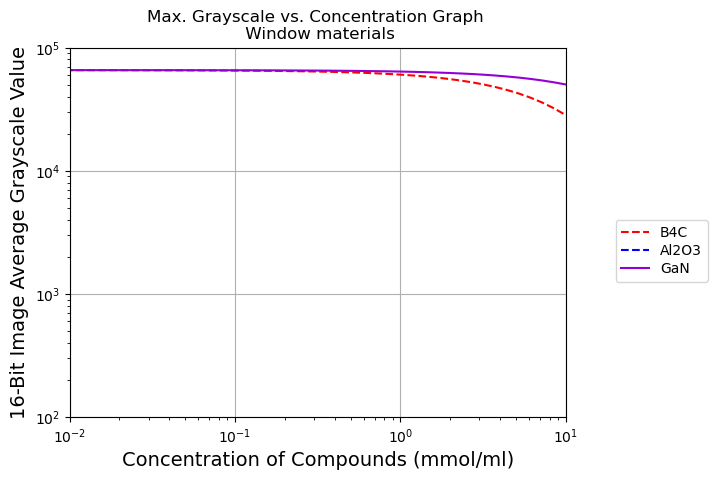

In [11]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')

plt.title("Max. Grayscale vs. Concentration Graph \n Window materials") 
#plt.axvline(x=0.13, color='k',linestyle='dotted')

plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


plt.plot(maxcB4C,maxB4C,color='red',linestyle='dashed',label='%s'%(vals_c2[3]))
plt.plot(maxcAl2O3,maxAl2O3,color='blue',linestyle='dashed',label='%s'%(vals_c2[0]))
plt.plot(maxcGaN,maxGaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Max. Grayscale vs. Concentration Graph for window materials %s.tiff"%(date),bbox_inches='tight', dpi=300)


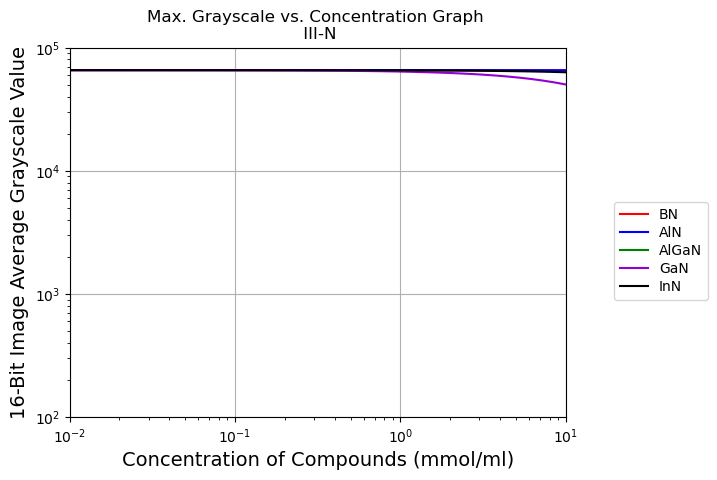

In [12]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')

plt.title("Max. Grayscale vs. Concentration Graph \n III-N") 
#lt.axvline(x=0.13, color='k',linestyle='dashed')

plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


plt.plot(maxcBN,maxBN,color='red',linestyle='solid',label='%s'%(vals_c2[4]))
plt.plot(maxcAlN,maxAlN,color='blue',linestyle='solid',label='%s'%(vals_c2[2]))
plt.plot(maxcAlGaN,maxAlGaN,color='green',linestyle='solid',label='%s'%(vals_c2[1]))
plt.plot(maxcGaN,maxGaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.plot(maxcInN,maxInN,color='black',linestyle='solid',label='%s'%(vals_c2[8]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Max. Grayscale vs. Concentration Graph for III-N %s.tiff"%(date),bbox_inches='tight', dpi=300)

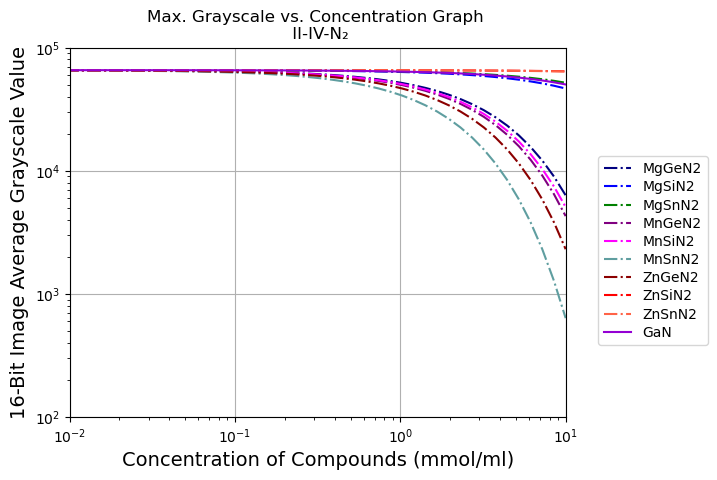

In [13]:
fig1, ax = plt.subplots()
 
#plt.axvline(x=0.13, color='k',linestyle='dotted')

plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
plt.title("Max. Grayscale vs. Concentration Graph \n II-IV-N₂") 
plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))

plt.plot(maxcMgGeN2,maxMgGeN2,color='navy',linestyle='dashdot',label='%s'%(vals_c2[12]))
plt.plot(maxcMgSiN2,maxMgSiN2,color='blue',linestyle='dashdot',label='%s'%(vals_c2[13]))
plt.plot(maxcMgSnN2,maxMgSnN2,color='green',linestyle='dashdot',label='%s'%(vals_c2[14]))
plt.plot(maxcMnGeN2,maxMnGeN2,color='purple',linestyle='dashdot',label='%s'%(vals_c2[15]))
plt.plot(maxcMnSiN2,maxMnSiN2,color='magenta',linestyle='dashdot',label='%s'%(vals_c2[16]))
plt.plot(maxcMnSnN2,maxMnSnN2,color='cadetblue',linestyle='dashdot',label='%s'%(vals_c2[17]))
plt.plot(maxcZnGeN2,maxZnGeN2,color='darkred',linestyle='dashdot',label='%s'%(vals_c2[25]))
plt.plot(maxcZnSiN2,maxZnSiN2,color='red',linestyle='dashdot',label='%s'%(vals_c2[26]))
plt.plot(maxcZnSnN2,maxZnSnN2,color='tomato',linestyle='dashdot',label='%s'%(vals_c2[27]))
plt.plot(maxcGaN,maxGaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.grid(True,which='major')
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Max. Grayscale vs. Concentration Graph for II-IV-N2 %s.tiff"%(date),bbox_inches='tight', dpi=300)

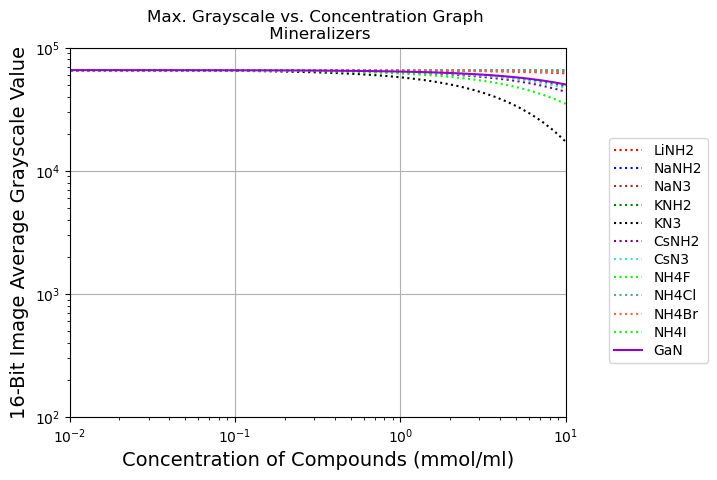

In [14]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')

plt.title("Max. Grayscale vs. Concentration Graph \n Mineralizers") 
#plt.axvline(x=0.13, color='k',linestyle='dotted')

plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))

plt.plot(maxcLiNH2,maxLiNH2,color='red',linestyle='dotted',label='%s'%(vals_c2[11])) 
plt.plot(maxcNaNH2,maxNaNH2,color='blue',linestyle='dotted',label='%s'%(vals_c2[24]))
plt.plot(maxcNaN3,maxNaN3,color='brown',linestyle='dotted',label='%s'%(vals_c2[23])) 
plt.plot(maxcKNH2,maxKNH2,color='green',linestyle='dotted',label='%s'%(vals_c2[10]))
plt.plot(maxcKN3,maxKN3,color='black',linestyle='dotted',label='%s'%(vals_c2[9]))
plt.plot(maxcCsNH2,maxCsNH2,color='purple',linestyle='dotted',label='%s'%(vals_c2[6]))
plt.plot(maxcCsN3,maxCsN3,color='turquoise',linestyle='dotted',label='%s'%(vals_c2[5]))
plt.plot(maxcNH4F,maxNH4F,color='lime',linestyle='dotted',label='%s'%(vals_c2[21]))
plt.plot(maxcNH4Cl,maxNH4Cl,color='cadetblue',linestyle='dotted',label='%s'%(vals_c2[20]))
plt.plot(maxcNH4Br,maxNH4Br,color='tomato',linestyle='dotted',label='%s'%(vals_c2[19]))
plt.plot(maxcNH4I,maxNH4I,color='lime',linestyle='dotted',label='%s'%(vals_c2[22]))  
plt.plot(maxcGaN,maxGaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Max. Grayscale vs. Concentration Graph for all mineralizers %s.tiff"%(date),bbox_inches='tight', dpi=300)

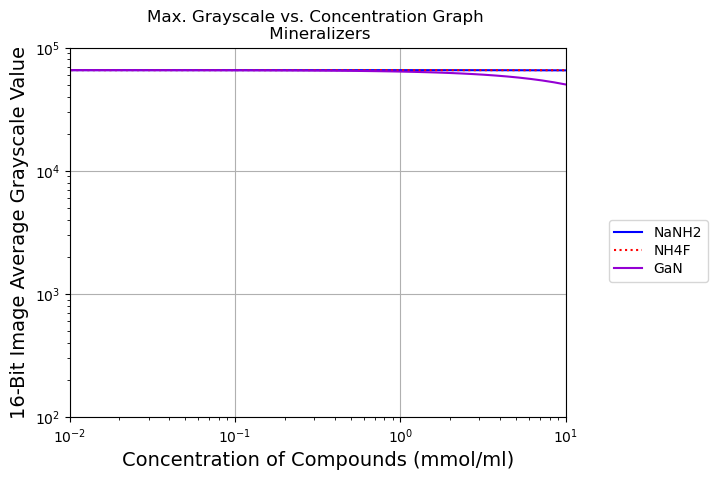

In [15]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')

plt.title("Max. Grayscale vs. Concentration Graph \n Mineralizers") 
#plt.axvline(x=0.13, color='k',linestyle='dotted')

plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')

plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))

#plt.plot(maxcLiNH2,maxLiNH2,color='red',linestyle='dotted',label='%s'%(vals_c2[11])) 
plt.plot(maxcNaNH2,maxNaNH2,color='blue',linestyle='solid',label='%s'%(vals_c2[24]))
#plt.plot(maxcNaN3,maxNaN3,color='brown',linestyle='dotted',label='%s'%(vals_c2[23])) 
#plt.plot(maxcKNH2,maxKNH2,color='green',linestyle='dotted',label='%s'%(vals_c2[10]))
#plt.plot(maxcKN3,maxKN3,color='black',linestyle='dotted',label='%s'%(vals_c2[9]))
#plt.plot(maxcCsNH2,maxCsNH2,color='purple',linestyle='dotted',label='%s'%(vals_c2[6]))
#plt.plot(maxcCsN3,maxCsN3,color='turquoise',linestyle='dotted',label='%s'%(vals_c2[5]))
plt.plot(maxcNH4F,maxNH4F,color='red',linestyle='dotted',label='%s'%(vals_c2[21]))
#plt.plot(maxcNH4Cl,maxNH4Cl,color='cadetblue',linestyle='dotted',label='%s'%(vals_c2[20]))
#plt.plot(maxcNH4Br,maxNH4Br,color='tomato',linestyle='dotted',label='%s'%(vals_c2[19]))
#plt.plot(maxcNH4I,maxNH4I,color='lime',linestyle='dotted',label='%s'%(vals_c2[22]))  
plt.plot(maxcGaN,maxGaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Max. Grayscale vs. Concentration Graph for main minerlaizers %s.tiff"%(date),bbox_inches='tight', dpi=300)

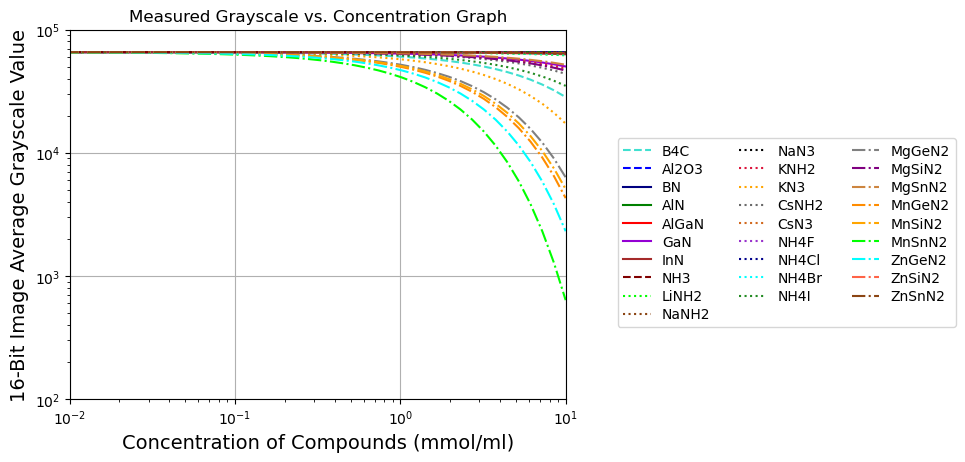

In [29]:
#calling function funct_cnst_keV to calculate the I1
Al2O3,cAl2O3=funct_cnst_keV_v4('Al2O3',Eph,I0,stepsize)              
AlGaN,cAlGaN=funct_cnst_keV_v4('AlGaN',Eph,I0,stepsize)            
AlN,cAlN=funct_cnst_keV_v4('AlN',Eph,I0,stepsize)         
B4C,cB4C=funct_cnst_keV_v4('B4C',Eph,I0,stepsize)         
BN,cBN=funct_cnst_keV_v4('BN',Eph,I0,stepsize)           
CsN3,cCsN3=funct_cnst_keV_v4('CsN3',Eph,I0,stepsize)           
CsNH2,cCsNH2=funct_cnst_keV_v4('CsNH2',Eph,I0,stepsize)            
GaN,cGaN=funct_cnst_keV_v4('GaN',Eph,I0,stepsize)           
InN,cInN=funct_cnst_keV_v4('InN',Eph,I0,stepsize)            
KN3,cKN3=funct_cnst_keV_v4('KN3',Eph,I0,stepsize)          
KNH2,cKNH2=funct_cnst_keV_v4('KNH2',Eph,I0,stepsize)            
LiNH2,cLiNH2=funct_cnst_keV_v4('LiNH2',Eph,I0,stepsize)         
MgGeN2,cMgGeN2=funct_cnst_keV_v4('MgGeN2',Eph,I0,stepsize)         
MgSiN2,cMgSiN2=funct_cnst_keV_v4('MgSiN2',Eph,I0,stepsize)         
MgSnN2,cMgSnN2=funct_cnst_keV_v4('MgSnN2',Eph,I0,stepsize)         
MnGeN2,cMnGeN2=funct_cnst_keV_v4('MnGeN2',Eph,I0,stepsize)         
MnSiN2,cMnSiN2=funct_cnst_keV_v4('MnSiN2',Eph,I0,stepsize)         
MnSnN2,cMnSnN2=funct_cnst_keV_v4('MnSnN2',Eph,I0,stepsize)
NH3,cNH3=funct_cnst_keV_v4('NH3',Eph,I0,stepsize)         
NH4Br,cNH4Br=funct_cnst_keV_v4('NH4Br',Eph,I0,stepsize)         
NH4Cl,cNH4Cl=funct_cnst_keV_v4('NH4Cl',Eph,I0,stepsize)         
NH4F,cNH4F=funct_cnst_keV_v4('NH4F',Eph,I0,stepsize)         
NH4I,cNH4I=funct_cnst_keV_v4('NH4I',Eph,I0,stepsize)           #if you wanna add new compound to the excel, 
NaN3,cNaN3=funct_cnst_keV_v4('NaN3',Eph,I0,stepsize)           #you also need to add here and the next cell
NaNH2,cNaNH2=funct_cnst_keV_v4('NaNH2',Eph,I0,stepsize)          
ZnGeN2,cZnGeN2=funct_cnst_keV_v4('ZnGeN2',Eph,I0,stepsize)         
ZnSiN2,cZnSiN2=funct_cnst_keV_v4('ZnSiN2',Eph,I0,stepsize)
ZnSnN2,cZnSnN2=funct_cnst_keV_v4('ZnSnN2',Eph,I0,stepsize) 

fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(np.arange(0,1.1,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
plt.title("Measured Grayscale vs. Concentration Graph") 
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
#plt.axvline(x=0.13, color='k',linestyle='dotted')
 #if you wanna add new compound to the excel you also need to add here and the previous cell


#window materials
plt.plot(cB4C,B4C,color='turquoise',linestyle='dashed',label='%s'%(vals_c2[3]))
plt.plot(cAl2O3,Al2O3,color='blue',linestyle='dashed',label='%s'%(vals_c2[0])) 

# III-N
plt.plot(cBN,BN,color='navy',linestyle='solid',label='%s'%(vals_c2[4]))
plt.plot(cAlN,AlN,color='green',linestyle='solid',label='%s'%(vals_c2[2]))
plt.plot(cAlGaN,AlGaN,color='red',linestyle='solid',label='%s'%(vals_c2[1]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.plot(cInN,InN,color='brown',linestyle='solid',label='%s'%(vals_c2[8]))

#solvent
plt.plot(cNH3,NH3,color='maroon',linestyle='dashed',label='%s'%(vals_c2[18]))

#basic mineralizers
plt.plot(cLiNH2,LiNH2,color='lime',linestyle='dotted',label='%s'%(vals_c2[11])) 
plt.plot(cNaNH2,NaNH2,color='saddlebrown',linestyle='dotted',label='%s'%(vals_c2[24]))
plt.plot(cNaN3,NaN3,color='black',linestyle='dotted',label='%s'%(vals_c2[23])) 
plt.plot(cKNH2,KNH2,color='crimson',linestyle='dotted',label='%s'%(vals_c2[10]))
plt.plot(cKN3,KN3,color='orange',linestyle='dotted',label='%s'%(vals_c2[9]))
plt.plot(cCsNH2,CsNH2,color='dimgray',linestyle='dotted',label='%s'%(vals_c2[6]))
plt.plot(cCsN3,CsN3,color='chocolate',linestyle='dotted',label='%s'%(vals_c2[5]))

#acidic mineralizes
plt.plot(cNH4F,NH4F,color='darkorchid',linestyle='dotted',label='%s'%(vals_c2[21]))
plt.plot(cNH4Cl,NH4Cl,color='darkblue',linestyle='dotted',label='%s'%(vals_c2[20]))
plt.plot(cNH4Br,NH4Br,color='cyan',linestyle='dotted',label='%s'%(vals_c2[19]))
plt.plot(cNH4I,NH4I,color='forestgreen',linestyle='dotted',label='%s'%(vals_c2[22]))      

# II-IV-N2
plt.plot(cMgGeN2,MgGeN2,color='gray',linestyle='dashdot',label='%s'%(vals_c2[12]))
plt.plot(cMgSiN2,MgSiN2,color='purple',linestyle='dashdot',label='%s'%(vals_c2[13]))
plt.plot(cMgSnN2,MgSnN2,color='peru',linestyle='dashdot',label='%s'%(vals_c2[14]))
plt.plot(cMnGeN2,MnGeN2,color='darkorange',linestyle='dashdot',label='%s'%(vals_c2[15]))
plt.plot(cMnSiN2,MnSiN2,color='orange',linestyle='dashdot',label='%s'%(vals_c2[16]))
plt.plot(cMnSnN2,MnSnN2,color='lime',linestyle='dashdot',label='%s'%(vals_c2[17]))
plt.plot(cZnGeN2,ZnGeN2,color='aqua',linestyle='dashdot',label='%s'%(vals_c2[25]))
plt.plot(cZnSiN2,ZnSiN2,color='tomato',linestyle='dashdot',label='%s'%(vals_c2[26]))
plt.plot(cZnSnN2,ZnSnN2,color='saddlebrown',linestyle='dashdot',label='%s'%(vals_c2[27]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.8, 0.45),labelspacing = 0.3,ncol=3)
plt.savefig("Measured Grayscale vs. Concentration Graph for all compounds involved %s.tiff"%(date),bbox_inches='tight', dpi=300)


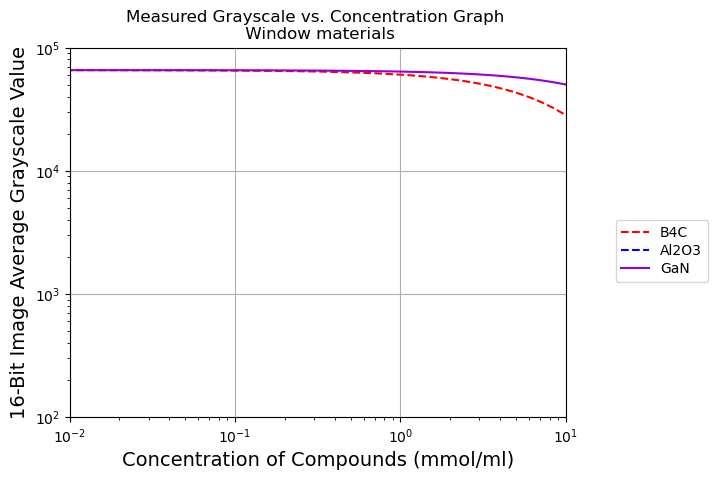

In [30]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(np.arange(0,1.1,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
plt.title("Measured Grayscale vs. Concentration Graph \n Window materials") 
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
#plt.axvline(x=0.13, color='k',linestyle='dotted')
 #if you wanna add new compound to the excel you also need to add here and the previous cell


#window materials
plt.plot(cB4C,B4C,color='red',linestyle='dashed',label='%s'%(vals_c2[3]))
plt.plot(cAl2O3,Al2O3,color='blue',linestyle='dashed',label='%s'%(vals_c2[0]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Measured Grayscale vs. Concentration Graph for window materials %s.tiff"%(date),bbox_inches='tight', dpi=300)

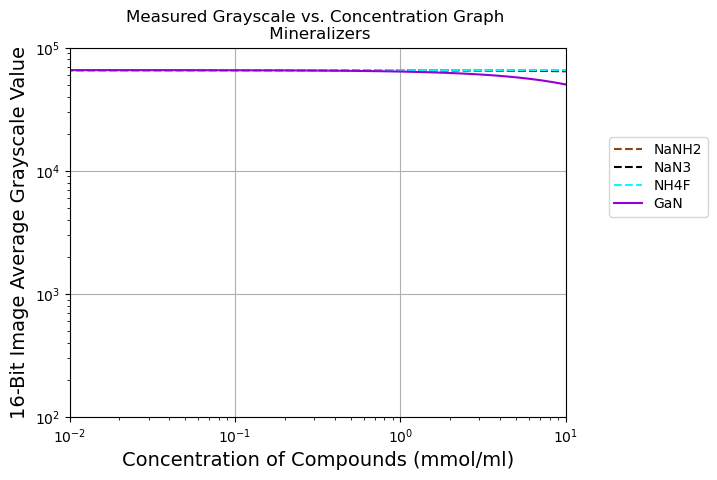

In [31]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(np.arange(0,1.1,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
plt.title("Measured Grayscale vs. Concentration Graph \n Mineralizers") 
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
#if you wanna add new compound to the excel you also need to add here and the previous cell

#basic mineralizers
plt.plot(cNaNH2,NaNH2,color='saddlebrown',linestyle='dashed',label='%s'%(vals_c2[24]))
plt.plot(cNaN3,NaN3,color='black',linestyle='dashed',label='%s'%(vals_c2[23])) 

#acidic mineralizes
plt.plot(cNH4F,NH4F,color='aqua',linestyle='dashed',label='%s'%(vals_c2[21]))

plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Measured Grayscale vs. Concentration Graph for main mineralizers-1 %s.tiff"%(date),bbox_inches='tight', dpi=300)


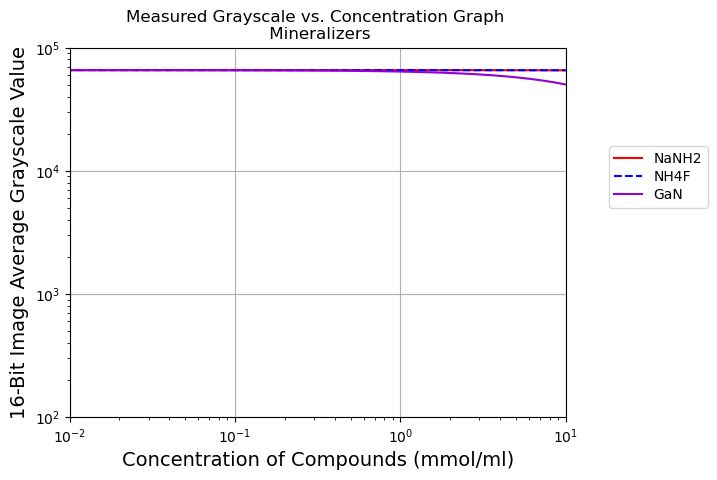

In [32]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
#plt.xticks(np.arange(0,1.1,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(pow(10,-2),pow(10,1))
plt.ylim(100,100000)
plt.title("Measured Grayscale vs. Concentration Graph \n Mineralizers") 
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
#if you wanna add new compound to the excel you also need to add here and the previous cell

#basic mineralizers
plt.plot(cNaNH2,NaNH2,color='red',linestyle='solid',label='%s'%(vals_c2[24]))

#acidic mineralizes
plt.plot(cNH4F,NH4F,color='blue',linestyle='dashed',label='%s'%(vals_c2[21]))

plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Measured Grayscale vs. Concentration Graph for main mineralizers %s.tiff"%(date),bbox_inches='tight', dpi=300)

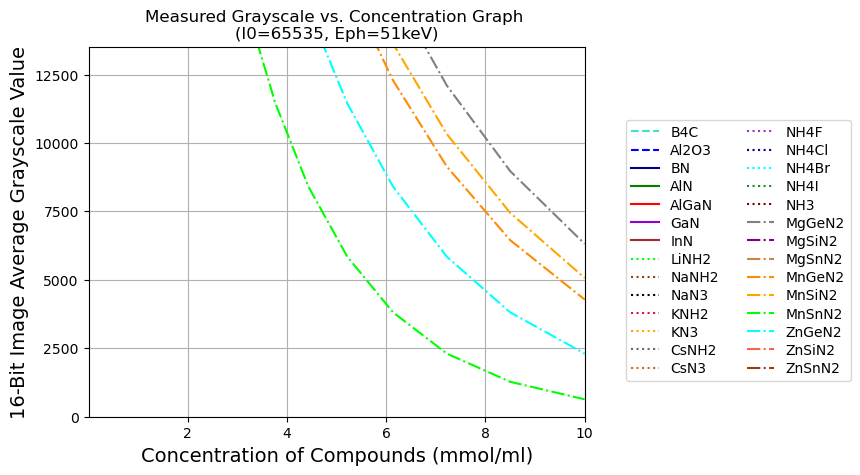

In [33]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,1.5,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
plt.xlim(0.00001,10)
plt.ylim(1,13500)
plt.yticks(np.arange(0,12501,2500))
 

plt.title("Measured Grayscale vs. Concentration Graph \n(I0=%s, Eph=%skeV)"%(I0,Eph))
 #if you wanna add new compound to the excel you also need to add here and the previous cell

#window materials
plt.plot(cB4C,B4C,color='turquoise',linestyle='dashed',label='%s'%(vals_c2[3]))
plt.plot(cAl2O3,Al2O3,color='blue',linestyle='dashed',label='%s'%(vals_c2[0])) 

# III-N
plt.plot(cBN,BN,color='navy',linestyle='solid',label='%s'%(vals_c2[4]))
plt.plot(cAlN,AlN,color='green',linestyle='solid',label='%s'%(vals_c2[2]))
plt.plot(cAlGaN,AlGaN,color='red',linestyle='solid',label='%s'%(vals_c2[1]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.plot(cInN,InN,color='brown',linestyle='solid',label='%s'%(vals_c2[8]))

#basic mineralizers
plt.plot(cLiNH2,LiNH2,color='lime',linestyle='dotted',label='%s'%(vals_c2[11])) 
plt.plot(cNaNH2,NaNH2,color='saddlebrown',linestyle='dotted',label='%s'%(vals_c2[24]))
plt.plot(cNaN3,NaN3,color='black',linestyle='dotted',label='%s'%(vals_c2[23])) 
plt.plot(cKNH2,KNH2,color='crimson',linestyle='dotted',label='%s'%(vals_c2[10]))
plt.plot(cKN3,KN3,color='orange',linestyle='dotted',label='%s'%(vals_c2[9]))
plt.plot(cCsNH2,CsNH2,color='dimgray',linestyle='dotted',label='%s'%(vals_c2[6]))
plt.plot(cCsN3,CsN3,color='chocolate',linestyle='dotted',label='%s'%(vals_c2[5]))

#acidic mineralizes
plt.plot(cNH4F,NH4F,color='darkorchid',linestyle='dotted',label='%s'%(vals_c2[21]))
plt.plot(cNH4Cl,NH4Cl,color='darkblue',linestyle='dotted',label='%s'%(vals_c2[20]))
plt.plot(cNH4Br,NH4Br,color='cyan',linestyle='dotted',label='%s'%(vals_c2[19]))
plt.plot(cNH4I,NH4I,color='forestgreen',linestyle='dotted',label='%s'%(vals_c2[22]))      

#solvent
plt.plot(cNH3,NH3,color='maroon',linestyle='dotted',label='%s'%(vals_c2[18]))

# II-IV-N2
plt.plot(cMgGeN2,MgGeN2,color='gray',linestyle='dashdot',label='%s'%(vals_c2[12]))
plt.plot(cMgSiN2,MgSiN2,color='purple',linestyle='dashdot',label='%s'%(vals_c2[13]))
plt.plot(cMgSnN2,MgSnN2,color='peru',linestyle='dashdot',label='%s'%(vals_c2[14]))
plt.plot(cMnGeN2,MnGeN2,color='darkorange',linestyle='dashdot',label='%s'%(vals_c2[15]))
plt.plot(cMnSiN2,MnSiN2,color='orange',linestyle='dashdot',label='%s'%(vals_c2[16]))
plt.plot(cMnSnN2,MnSnN2,color='lime',linestyle='dashdot',label='%s'%(vals_c2[17]))
plt.plot(cZnGeN2,ZnGeN2,color='aqua',linestyle='dashdot',label='%s'%(vals_c2[25]))
plt.plot(cZnSiN2,ZnSiN2,color='tomato',linestyle='dashdot',label='%s'%(vals_c2[26]))
plt.plot(cZnSnN2,ZnSnN2,color='saddlebrown',linestyle='dashdot',label='%s'%(vals_c2[27]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.55, 0.45),labelspacing = 0.3,ncol=2)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for all compounds involved %s.tiff"%(date),bbox_inches='tight', dpi=300)


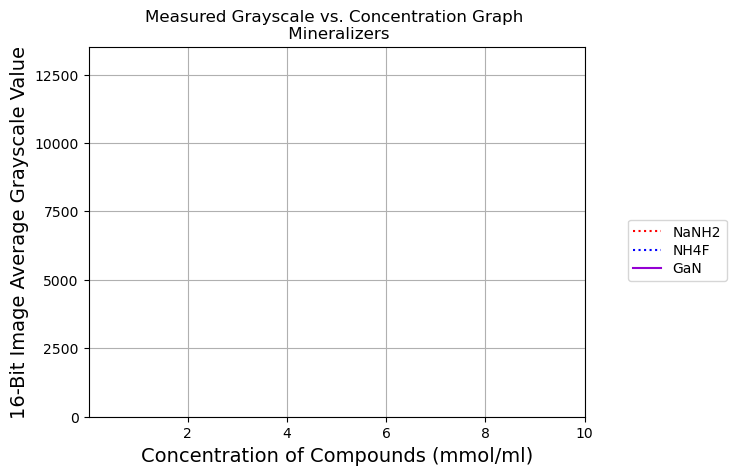

In [34]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,1.5,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
plt.xlim(0.00001,10)
plt.ylim(1,13500)
plt.yticks(np.arange(0,12501,2500))


plt.title("Measured Grayscale vs. Concentration Graph \n Mineralizers")
 #if you wanna add new compound to the excel you also need to add here and the previous cell


#basic mineralizers

plt.plot(cNaNH2,NaNH2,color='red',linestyle='dotted',label='%s'%(vals_c2[24]))


#acidic mineralizes
plt.plot(cNH4F,NH4F,color='blue',linestyle='dotted',label='%s'%(vals_c2[21]))

plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for main mineralizers %s.tiff"%(date),bbox_inches='tight', dpi=300)


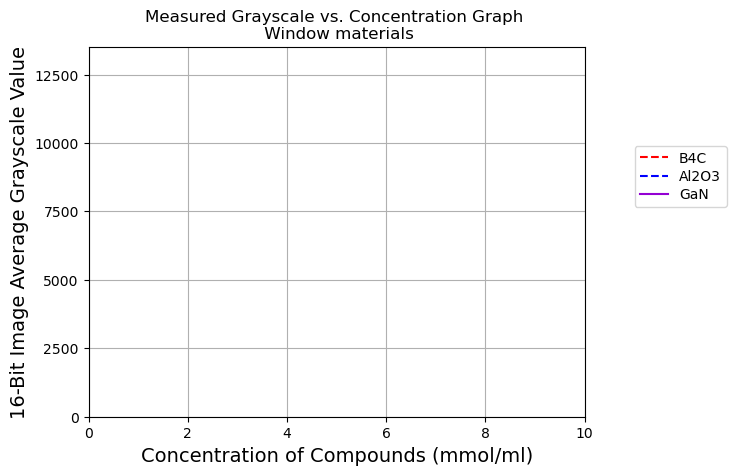

In [35]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,1.5,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
plt.xlim(0,10)
plt.ylim(1,13500)
plt.yticks(np.arange(0,12501,2500))

plt.title("Measured Grayscale vs. Concentration Graph \n Window materials")
 #if you wanna add new compound to the excel you also need to add here and the previous cell

#window materials
plt.plot(cB4C,B4C,color='red',linestyle='dashed',label='%s'%(vals_c2[3]))
plt.plot(cAl2O3,Al2O3,color='blue',linestyle='dashed',label='%s'%(vals_c2[0])) 
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for window materials %s.tiff"%(date),bbox_inches='tight', dpi=300)



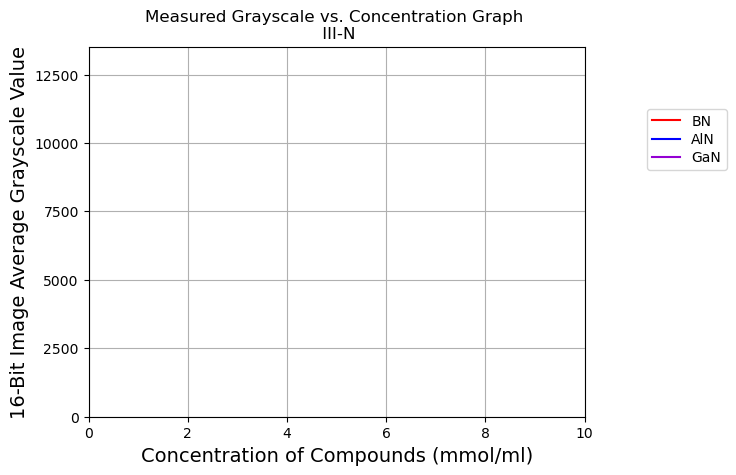

In [36]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,1.5,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))

plt.xlim(0,10)
plt.ylim(1,13500)
plt.yticks(np.arange(0,12501,2500))
plt.title("Measured Grayscale vs. Concentration Graph \n III-N")
 #if you wanna add new compound to the excel you also need to add here and the previous cell

# III-N
plt.plot(cBN,BN,color='red',linestyle='solid',label='%s'%(vals_c2[4]))
plt.plot(cAlN,AlN,color='blue',linestyle='solid',label='%s'%(vals_c2[2]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
#plt.plot(cAlGaN,AlGaN,color='turquoise',linestyle='solid',label='%s'%(vals_c2[1]))
#plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
#plt.plot(cInN,InN,color='red',linestyle='solid',label='%s'%(vals_c2[8]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.75),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for III-N - a %s.tiff"%(date),bbox_inches='tight', dpi=300)

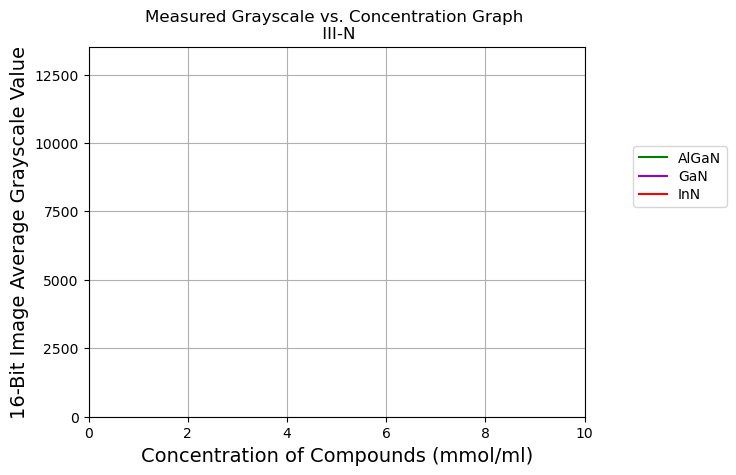

In [37]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,1.5,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))

plt.xlim(0,10)
plt.ylim(1,13500)
plt.yticks(np.arange(0,12501,2500))
plt.title("Measured Grayscale vs. Concentration Graph \n III-N")
 #if you wanna add new compound to the excel you also need to add here and the previous cell

# III-N

plt.plot(cAlGaN,AlGaN,color='green',linestyle='solid',label='%s'%(vals_c2[1]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
plt.plot(cInN,InN,color='red',linestyle='solid',label='%s'%(vals_c2[8]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for III-N - b %s.tiff"%(date),bbox_inches='tight', dpi=300)


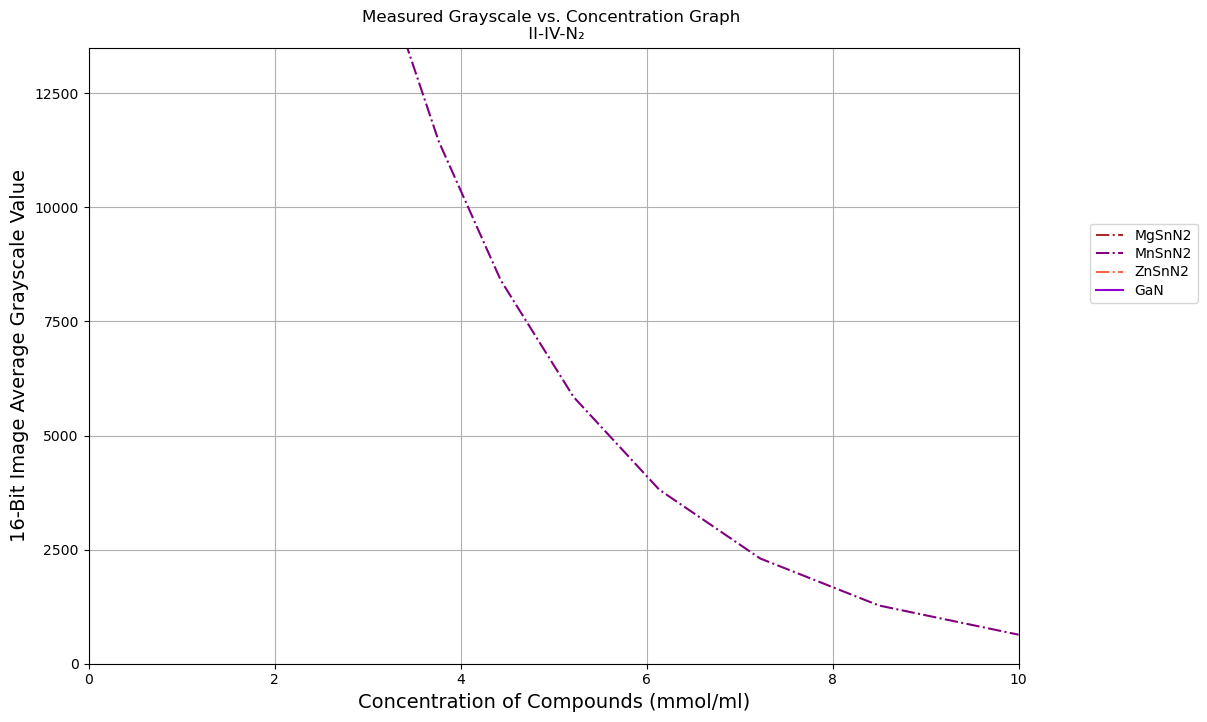

In [38]:
fig1, ax = plt.subplots(figsize=(12, 8))
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,0.04,0.01))
plt.xlim(0,10)
plt.ylim(0,13500)
plt.yticks(np.arange(0,12501,2500))
#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


plt.title("Measured Grayscale vs. Concentration Graph \n II-IV-N₂")
 #if you wanna add new compound to the excel you also need to add here and the previous cels
# II-IV-N2
#plt.plot(cMgGeN2,MgGeN2,color='red',linestyle='dashdot',label='%s'%(vals_c2[12]))
#plt.plot(cMgSiN2,MgSiN2,color='blue',linestyle='dashdot',label='%s'%(vals_c2[13]))
plt.plot(cMgSnN2,MgSnN2,color='brown',linestyle='dashdot',label='%s'%(vals_c2[14]))
#plt.plot(cMnGeN2,MnGeN2,color='green',linestyle='dashdot',label='%s'%(vals_c2[15]))
#plt.plot(cMnSiN2,MnSiN2,color='black',linestyle='dashdot',label='%s'%(vals_c2[16]))
plt.plot(cMnSnN2,MnSnN2,color='purple',linestyle='dashdot',label='%s'%(vals_c2[17]))
#plt.plot(cZnGeN2,ZnGeN2,color='turquoise',linestyle='dashdot',label='%s'%(vals_c2[25]))
#plt.plot(cZnSiN2,ZnSiN2,color='darkorange',linestyle='dashdot',label='%s'%(vals_c2[26]))
plt.plot(cZnSnN2,ZnSnN2,color='tomato',linestyle='dashdot',label='%s'%(vals_c2[27]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.2, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for II-IV-N₂ - a %s.tiff"%(date),bbox_inches='tight', dpi=300)

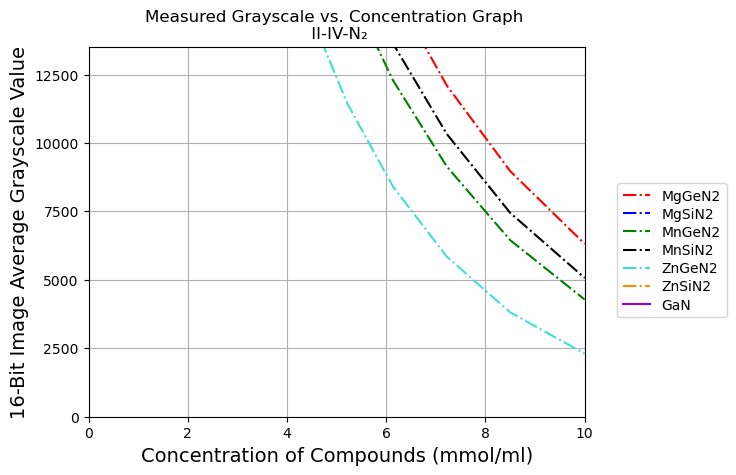

In [39]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,0.04,0.01))
plt.xlim(0,10)
plt.ylim(0,13500)
plt.yticks(np.arange(0,12501,2500))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


plt.title("Measured Grayscale vs. Concentration Graph \n II-IV-N₂")
 #if you wanna add new compound to the excel you also need to add here and the previous cels
# II-IV-N2

plt.plot(cMgGeN2,MgGeN2,color='red',linestyle='dashdot',label='%s'%(vals_c2[12]))
plt.plot(cMgSiN2,MgSiN2,color='blue',linestyle='dashdot',label='%s'%(vals_c2[13]))
#plt.plot(cMgSnN2,MgSnN2,color='brown',linestyle='dashdot',label='%s'%(vals_c2[14]))
plt.plot(cMnGeN2,MnGeN2,color='green',linestyle='dashdot',label='%s'%(vals_c2[15]))
plt.plot(cMnSiN2,MnSiN2,color='black',linestyle='dashdot',label='%s'%(vals_c2[16]))
#plt.plot(cMnSnN2,MnSnN2,color='purple',linestyle='dashdot',label='%s'%(vals_c2[17]))
plt.plot(cZnGeN2,ZnGeN2,color='turquoise',linestyle='dashdot',label='%s'%(vals_c2[25]))
plt.plot(cZnSiN2,ZnSiN2,color='darkorange',linestyle='dashdot',label='%s'%(vals_c2[26]))
plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))
#plt.plot(cZnSnN2,ZnSnN2,color='tomato',linestyle='dashdot',label='%s'%(vals_c2[27]))
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for II-IV-N₂ - b %s.tiff"%(date),bbox_inches='tight', dpi=300)

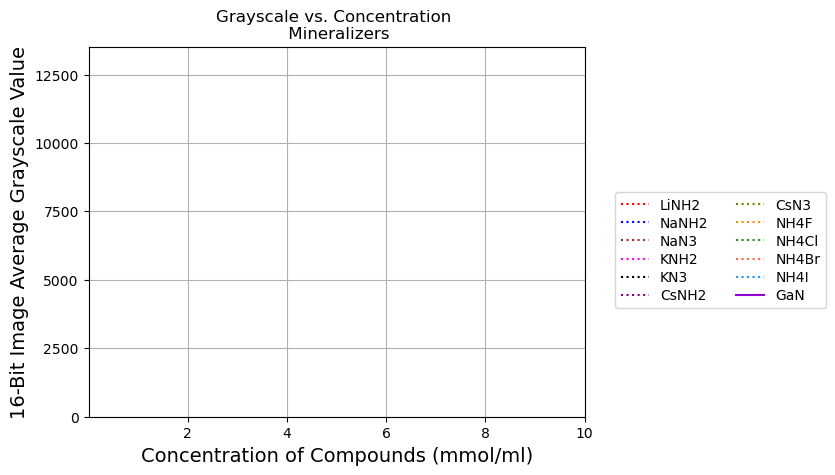

In [40]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of Compounds (mmol/ml)',fontsize=14)
plt.title("Grayscale vs. Concentration \n Mineralizers")
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.xticks(np.arange(0,1.5,0.1))
#plt.yticks(np.arange(0.5,7.5,0.5))

#plt.ylim(pow(10,-20),pow(10,7))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))
plt.xlim(0.00001,10)
plt.ylim(0,13500)
plt.yticks(np.arange(0,12501,2500))


#basic mineralizers
plt.plot(cLiNH2,LiNH2,color='red',linestyle='dotted',label='%s'%(vals_c2[11])) 
plt.plot(cNaNH2,NaNH2,color='blue',linestyle='dotted',label='%s'%(vals_c2[24]))
plt.plot(cNaN3,NaN3,color='brown',linestyle='dotted',label='%s'%(vals_c2[23])) 
plt.plot(cKNH2,KNH2,color='magenta',linestyle='dotted',label='%s'%(vals_c2[10]))
plt.plot(cKN3,KN3,color='black',linestyle='dotted',label='%s'%(vals_c2[9]))
plt.plot(cCsNH2,CsNH2,color='purple',linestyle='dotted',label='%s'%(vals_c2[6]))
plt.plot(cCsN3,CsN3,color='olive',linestyle='dotted',label='%s'%(vals_c2[5]))

#acidic mineralizes
plt.plot(cNH4F,NH4F,color='darkorange',linestyle='dotted',label='%s'%(vals_c2[21]))
plt.plot(cNH4Cl,NH4Cl,color='forestgreen',linestyle='dotted',label='%s'%(vals_c2[20]))
plt.plot(cNH4Br,NH4Br,color='tomato',linestyle='dotted',label='%s'%(vals_c2[19]))
plt.plot(cNH4I,NH4I,color='dodgerblue',linestyle='dotted',label='%s'%(vals_c2[22])) 

plt.plot(cGaN,GaN,color='darkviolet',linestyle='solid',label='%s'%(vals_c2[7]))

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.5, 0.45),labelspacing = 0.3,ncol=2)
plt.savefig("Linear plot of Measured Grayscale vs. Concentration Graph for all mineralizers %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
GaN10keV,C10keV=funct_cnst_keV_v4('GaN',10,I0,stepsize) 
GaN20keV,C20keV=funct_cnst_keV_v4('GaN',20,I0,stepsize)  
GaN30keV,C30keV=funct_cnst_keV_v4('GaN',30,I0,stepsize)  
GaN40keV,C40keV=funct_cnst_keV_v4('GaN',40,I0,stepsize)  
GaN50keV,C50keV=funct_cnst_keV_v4('GaN',50,I0,stepsize)  
GaN60keV,C60keV=funct_cnst_keV_v4('GaN',60,I0,stepsize)  
GaN70keV,C70keV=funct_cnst_keV_v4('GaN',70,I0,stepsize)  
GaN80keV,C80keV=funct_cnst_keV_v4('GaN',80,I0,stepsize)  
GaN90keV,C90keV=funct_cnst_keV_v4('GaN',90,I0,stepsize)  
GaN100keV,C100keV=funct_cnst_keV_v4('GaN',100,I0,stepsize)  

fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration Values of GaN (mmol/ml)',fontsize=14)

ax.set_yscale('log')
plt.xlim(0,0.09)
plt.xticks(np.arange(0,0.09,0.01))
plt.ylim(pow(10,0),pow(10,5))
plt.axvline(x=0.13, color='k',linestyle='dashed')
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=12))
plt.title("Measured Grayscale vs. conc. at different photon energies \n(I0=%s,stepsize=%s) "%(I0,stepsize))

plt.plot(C10keV,GaN10keV,color='red',label='GaN 10keV')
plt.plot(C20keV,GaN20keV,color='blue',label='GaN 20keV')
plt.plot(C30keV,GaN30keV,color='brown',label='GaN 30keV')
plt.plot(C40keV,GaN40keV,color='green',label='GaN 40keV')
plt.plot(C50keV,GaN50keV,color='black',label='GaN 50keV')
plt.plot(C60keV,GaN60keV,color='purple',label='GaN 60keV')
plt.plot(C70keV,GaN70keV,color='turquoise',label='GaN 70keV')
plt.plot(C80keV,GaN80keV,color='darkorange',label='GaN 80keV')
plt.plot(C90keV,GaN90keV,color='lime',label='GaN 90keV')
plt.plot(C100keV,GaN100keV,color='tomato',label='GaN 100keV')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.35, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Measured Grayscale vs. concentration at different photon energies %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
GaN10keV,C10keV=funct_cnst_keV_v4('GaN',10,I0,stepsize) 
GaN20keV,C20keV=funct_cnst_keV_v4('GaN',20,I0,stepsize)  
GaN30keV,C30keV=funct_cnst_keV_v4('GaN',30,I0,stepsize)  
GaN40keV,C40keV=funct_cnst_keV_v4('GaN',40,I0,stepsize)  
GaN50keV,C50keV=funct_cnst_keV_v4('GaN',50,I0,stepsize)  
GaN60keV,C60keV=funct_cnst_keV_v4('GaN',60,I0,stepsize)  
GaN70keV,C70keV=funct_cnst_keV_v4('GaN',70,I0,stepsize)  
GaN80keV,C80keV=funct_cnst_keV_v4('GaN',80,I0,stepsize)  
GaN90keV,C90keV=funct_cnst_keV_v4('GaN',90,I0,stepsize)  
GaN100keV,C100keV=funct_cnst_keV_v4('GaN',100,I0,stepsize)  

fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration Values of GaN (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
plt.xlim(0,0.4)
plt.xticks(np.arange(0,0.4,0.05))
plt.ylim(5000,12000)
plt.axvline(x=0.13, color='k',linestyle='dashed')
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=12))
plt.title("Measured Grayscale vs. conc. at different photon energies \n(I0=%s,stepsize=%s) "%(I0,stepsize))

plt.plot(C10keV,GaN10keV,color='red',label='GaN 10keV')
plt.plot(C20keV,GaN20keV,color='blue',label='GaN 20keV')
plt.plot(C30keV,GaN30keV,color='brown',label='GaN 30keV')
#plt.plot(C40keV,GaN40keV,color='green',label='GaN 40keV')
#plt.plot(C50keV,GaN50keV,color='black',label='GaN 50keV')
#plt.plot(C60keV,GaN60keV,color='purple',label='GaN 60keV')
#plt.plot(C70keV,GaN70keV,color='dodgerblue',label='GaN 70keV')
#plt.plot(C80keV,GaN80keV,color='darkorange',label='GaN 80keV')
#plt.plot(C90keV,GaN90keV,color='lime',label='GaN 90keV')
#plt.plot(C100keV,GaN100keV,color='tomato',label='GaN 100keV')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.35, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. concentration till 30 keV %s.tiff"%(date),bbox_inches='tight', dpi=300)


In [ ]:
GaN10keV,C10keV=funct_cnst_keV_v4('GaN',10,I0,stepsize) 
GaN20keV,C20keV=funct_cnst_keV_v4('GaN',20,I0,stepsize)  
GaN30keV,C30keV=funct_cnst_keV_v4('GaN',30,I0,stepsize)  
GaN40keV,C40keV=funct_cnst_keV_v4('GaN',40,I0,stepsize)  
GaN50keV,C50keV=funct_cnst_keV_v4('GaN',50,I0,stepsize)  
GaN60keV,C60keV=funct_cnst_keV_v4('GaN',60,I0,stepsize)  
GaN70keV,C70keV=funct_cnst_keV_v4('GaN',70,I0,stepsize)  
GaN80keV,C80keV=funct_cnst_keV_v4('GaN',80,I0,stepsize)  
GaN90keV,C90keV=funct_cnst_keV_v4('GaN',90,I0,stepsize)  
GaN100keV,C100keV=funct_cnst_keV_v4('GaN',100,I0,stepsize)  

fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration Values of GaN (mmol/ml)',fontsize=14)

#ax.set_yscale('log')
plt.xlim(0,0.4)
plt.xticks(np.arange(0,0.4,0.05))
plt.ylim(11000,11500)
plt.axvline(x=0.13, color='k',linestyle='dashed')
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=12))
plt.title("Measured Grayscale vs. conc. at different photon energies \n(I0=%s,stepsize=%s)"%(I0,stepsize))

plt.plot(C40keV,GaN40keV,color='green',label='GaN 40keV')
plt.plot(C50keV,GaN50keV,color='black',label='GaN 50keV')
plt.plot(C60keV,GaN60keV,color='purple',label='GaN 60keV')
plt.plot(C70keV,GaN70keV,color='dodgerblue',label='GaN 70keV')
plt.plot(C80keV,GaN80keV,color='darkorange',label='GaN 80keV')
plt.plot(C90keV,GaN90keV,color='lime',label='GaN 90keV')
plt.plot(C100keV,GaN100keV,color='tomato',label='GaN 100keV')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.35, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Linear plot of Measured Grayscale vs. concentration from 40 till 100 keV %s.tiff"%(date),bbox_inches='tight', dpi=300)



In [ ]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of GaN (mmol/ml)',fontsize=14)

ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(pow(10,-3),pow(10,1))
plt.ylim(pow(10,0),pow(10,5))
plt.axvline(x=0.13, color='k',linestyle='dashed',label='GaN x=0.13')
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=12))
plt.title("Measured Grayscale vs. conc. at different photon energies \n(I0=%s,stepsize=%s) "%(I0,stepsize))

plt.plot(C10keV,GaN10keV,color='red',label='GaN 10keV')
plt.plot(C20keV,GaN20keV,color='blue',label='GaN 20keV')
plt.plot(C30keV,GaN30keV,color='brown',label='GaN 30keV')
plt.plot(C40keV,GaN40keV,color='green',label='GaN 40keV')
plt.plot(C50keV,GaN50keV,color='black',label='GaN 50keV')
plt.plot(C60keV,GaN60keV,color='purple',label='GaN 60keV')
plt.plot(C70keV,GaN70keV,color='turquoise',label='GaN 70keV')
plt.plot(C80keV,GaN80keV,color='darkorange',label='GaN 80keV')
plt.plot(C90keV,GaN90keV,color='lime',label='GaN 90keV')
plt.plot(C100keV,GaN100keV,color='tomato',label='GaN 100keV')
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.4, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Log plot of Measured Grayscale vs. concentration at different photon energies %s.tiff"%(date),bbox_inches='tight', dpi=300)


In [ ]:
maxGaN10keV,maxC10keV=funct_cnst_keV_v4('GaN',10,I0max,stepsize) 
maxGaN20keV,maxC20keV=funct_cnst_keV_v4('GaN',20,I0max,stepsize)  
maxGaN30keV,maxC30keV=funct_cnst_keV_v4('GaN',30,I0max,stepsize)  
maxGaN40keV,maxC40keV=funct_cnst_keV_v4('GaN',40,I0max,stepsize)  
maxGaN50keV,maxC50keV=funct_cnst_keV_v4('GaN',50,I0max,stepsize)  
maxGaN60keV,maxC60keV=funct_cnst_keV_v4('GaN',60,I0max,stepsize)  
maxGaN70keV,maxC70keV=funct_cnst_keV_v4('GaN',70,I0max,stepsize)  
maxGaN80keV,maxC80keV=funct_cnst_keV_v4('GaN',80,I0max,stepsize)  
maxGaN90keV,maxC90keV=funct_cnst_keV_v4('GaN',90,I0max,stepsize)  
maxGaN100keV,maxC100keV=funct_cnst_keV_v4('GaN',100,I0max,stepsize)  



fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Concentration of GaN (mmol/ml)',fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlim(pow(10,-3),pow(10,1))
#plt.xticks(np.arange(0,0.11,0.01))
plt.ylim(pow(10,3),pow(10,5))
plt.axvline(x=0.13, color='k',linestyle='dashed',label='GaN x=0.13')
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=12))
plt.title("Max. Grayscale vs. conc. at different photon energies \n(I0=%s)"%(I0max))

plt.plot(maxC10keV,maxGaN10keV,color='red',label='GaN 10keV')
plt.plot(maxC20keV,maxGaN20keV,color='blue',label='GaN 20keV')
plt.plot(maxC30keV,maxGaN30keV,color='brown',label='GaN 30keV')
plt.plot(maxC40keV,maxGaN40keV,color='green',label='GaN 40keV')
plt.plot(maxC50keV,maxGaN50keV,color='black',label='GaN 50keV')
plt.plot(maxC60keV,maxGaN60keV,color='purple',label='GaN 60keV')
plt.plot(maxC70keV,maxGaN70keV,color='turquoise',label='GaN 70keV')
plt.plot(maxC80keV,maxGaN80keV,color='darkorange',label='GaN 80keV')
plt.plot(maxC90keV,maxGaN90keV,color='lime',label='GaN 90keV')
plt.plot(maxC100keV,maxGaN100keV,color='tomato',label='GaN 100keV')
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.35, 0.65),labelspacing = 0.3,ncol=1)
plt.savefig("Log plot of Max. Grayscale vs. concentration at different photon energies %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
GaN000,Eph000=funct_Eph_values_finder_in_specific_conc('GaN',0.0,I0)
GaN005,Eph005=funct_Eph_values_finder_in_specific_conc('GaN',0.5,I0)
GaN010,Eph010=funct_Eph_values_finder_in_specific_conc('GaN',1,I0)
GaN015,Eph015=funct_Eph_values_finder_in_specific_conc('GaN',1.5,I0)
GaN020,Eph020=funct_Eph_values_finder_in_specific_conc('GaN',2,I0)
GaN025,Eph025=funct_Eph_values_finder_in_specific_conc('GaN',2.5,I0)
GaN030,Eph030=funct_Eph_values_finder_in_specific_conc('GaN',3,I0)
GaN035,Eph035=funct_Eph_values_finder_in_specific_conc('GaN',3.5,I0)
GaN040,Eph040=funct_Eph_values_finder_in_specific_conc('GaN',4,I0)
GaN045,Eph045=funct_Eph_values_finder_in_specific_conc('GaN',4.5,I0)
GaN050,Eph050=funct_Eph_values_finder_in_specific_conc('GaN',5,I0)
GaN055,Eph055=funct_Eph_values_finder_in_specific_conc('GaN',5.5,I0)
GaN060,Eph060=funct_Eph_values_finder_in_specific_conc('GaN',6,I0)
GaN065,Eph065=funct_Eph_values_finder_in_specific_conc('GaN',6.5,I0)
GaN070,Eph070=funct_Eph_values_finder_in_specific_conc('GaN',7,I0)
GaN075,Eph075=funct_Eph_values_finder_in_specific_conc('GaN',7.5,I0)
GaN080,Eph080=funct_Eph_values_finder_in_specific_conc('GaN',8,I0)
GaN085,Eph085=funct_Eph_values_finder_in_specific_conc('GaN',8.5,I0)
GaN090,Eph090=funct_Eph_values_finder_in_specific_conc('GaN',9,I0)
GaN095,Eph095=funct_Eph_values_finder_in_specific_conc('GaN',9.5,I0)
GaN100,Eph100=funct_Eph_values_finder_in_specific_conc('GaN',10,I0)



fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,121,10))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,120)
plt.ylim(pow(10,-20),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
plt.axvline(x=51.2, color='gray',linestyle='dotted')
plt.axvline(x=110, color='k',linestyle='dotted')
plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
plt.plot(Eph045,GaN045,color='khaki',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.65),labelspacing = 0.3,ncol=2)
plt.savefig("Measured Grayscale values vs. photon energies for different conc. values with 51.2 and 110 mark %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
GaN000,Eph000=funct_Eph_values_finder_in_specific_conc('GaN',0.0,I0)
GaN005,Eph005=funct_Eph_values_finder_in_specific_conc('GaN',0.5,I0)
GaN010,Eph010=funct_Eph_values_finder_in_specific_conc('GaN',1,I0)
GaN015,Eph015=funct_Eph_values_finder_in_specific_conc('GaN',1.5,I0)
GaN020,Eph020=funct_Eph_values_finder_in_specific_conc('GaN',2,I0)
GaN025,Eph025=funct_Eph_values_finder_in_specific_conc('GaN',2.5,I0)
GaN030,Eph030=funct_Eph_values_finder_in_specific_conc('GaN',3,I0)
GaN035,Eph035=funct_Eph_values_finder_in_specific_conc('GaN',3.5,I0)
GaN040,Eph040=funct_Eph_values_finder_in_specific_conc('GaN',4,I0)
GaN045,Eph045=funct_Eph_values_finder_in_specific_conc('GaN',4.5,I0)
GaN050,Eph050=funct_Eph_values_finder_in_specific_conc('GaN',5,I0)
GaN055,Eph055=funct_Eph_values_finder_in_specific_conc('GaN',5.5,I0)
GaN060,Eph060=funct_Eph_values_finder_in_specific_conc('GaN',6,I0)
GaN065,Eph065=funct_Eph_values_finder_in_specific_conc('GaN',6.5,I0)
GaN070,Eph070=funct_Eph_values_finder_in_specific_conc('GaN',7,I0)
GaN075,Eph075=funct_Eph_values_finder_in_specific_conc('GaN',7.5,I0)
GaN080,Eph080=funct_Eph_values_finder_in_specific_conc('GaN',8,I0)
GaN085,Eph085=funct_Eph_values_finder_in_specific_conc('GaN',8.5,I0)
GaN090,Eph090=funct_Eph_values_finder_in_specific_conc('GaN',9,I0)
GaN095,Eph095=funct_Eph_values_finder_in_specific_conc('GaN',9.5,I0)
GaN100,Eph100=funct_Eph_values_finder_in_specific_conc('GaN',10,I0)



fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,121,10))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,120)
plt.ylim(pow(10,-20),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
plt.axvline(x=51.2, color='gray',linestyle='dotted')

plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
plt.plot(Eph045,GaN045,color='khaki',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.65),labelspacing = 0.3,ncol=2)
plt.savefig("Measured Grayscale values vs. photon energies for different conc. values with 51.2 mark %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
GaN000,Eph000=funct_Eph_values_finder_in_specific_conc('GaN',0.0,I0)
GaN005,Eph005=funct_Eph_values_finder_in_specific_conc('GaN',0.5,I0)
GaN010,Eph010=funct_Eph_values_finder_in_specific_conc('GaN',1,I0)
GaN015,Eph015=funct_Eph_values_finder_in_specific_conc('GaN',1.5,I0)
GaN020,Eph020=funct_Eph_values_finder_in_specific_conc('GaN',2,I0)
GaN025,Eph025=funct_Eph_values_finder_in_specific_conc('GaN',2.5,I0)
GaN030,Eph030=funct_Eph_values_finder_in_specific_conc('GaN',3,I0)
GaN035,Eph035=funct_Eph_values_finder_in_specific_conc('GaN',3.5,I0)
GaN040,Eph040=funct_Eph_values_finder_in_specific_conc('GaN',4,I0)
GaN045,Eph045=funct_Eph_values_finder_in_specific_conc('GaN',4.5,I0)
GaN050,Eph050=funct_Eph_values_finder_in_specific_conc('GaN',5,I0)
GaN055,Eph055=funct_Eph_values_finder_in_specific_conc('GaN',5.5,I0)
GaN060,Eph060=funct_Eph_values_finder_in_specific_conc('GaN',6,I0)
GaN065,Eph065=funct_Eph_values_finder_in_specific_conc('GaN',6.5,I0)
GaN070,Eph070=funct_Eph_values_finder_in_specific_conc('GaN',7,I0)
GaN075,Eph075=funct_Eph_values_finder_in_specific_conc('GaN',7.5,I0)
GaN080,Eph080=funct_Eph_values_finder_in_specific_conc('GaN',8,I0)
GaN085,Eph085=funct_Eph_values_finder_in_specific_conc('GaN',8.5,I0)
GaN090,Eph090=funct_Eph_values_finder_in_specific_conc('GaN',9,I0)
GaN095,Eph095=funct_Eph_values_finder_in_specific_conc('GaN',9.5,I0)
GaN100,Eph100=funct_Eph_values_finder_in_specific_conc('GaN',10,I0)



fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,121,10))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,120)
plt.ylim(pow(10,-20),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))

plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
plt.plot(Eph045,GaN045,color='khaki',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.65),labelspacing = 0.3,ncol=2)
plt.savefig("Measured Grayscale values vs. photon energies for different conc. values %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:



fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,121,10))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,120)
plt.ylim(pow(10,0),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
#plt.axvline(x=51.2, color='gray',linestyle='dotted')
plt.axvline(x=110, color='k',linestyle='dotted')
plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
plt.plot(Eph045,GaN045,color='khaki',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.45),labelspacing = 0.5,ncol=2)
plt.savefig("Realistic plot of Measured Grayscale values vs. photon energies for different conc. values %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,12.1,1))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,12)
plt.ylim(pow(10,0),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
#plt.axvline(x=51.2, color='gray',linestyle='dotted')
#plt.axvline(x=110, color='k',linestyle='dotted')
#plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
#plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
#plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
#plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
#plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
#plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
#plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
plt.plot(Eph045,GaN045,color='maroon',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.45),labelspacing = 0.5,ncol=2)
plt.savefig("Realistic plot of Measured Grayscale values vs. photon energies for different conc. values from 3.5 till 10 mmol %s.tiff"%(date),bbox_inches='tight', dpi=300)


In [ ]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,121,10))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,120)
plt.ylim(pow(10,0),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
plt.axvline(x=51.2, color='gray',linestyle='dotted')
plt.axvline(x=110, color='k',linestyle='dotted')
plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
#plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
#plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
#plt.plot(Eph045,GaN045,color='lime',linestyle='dashed',label='GaN-4.5 mmol/ml')
#plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
#plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
#plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
#plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
#plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
#plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
#plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
#plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
#plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
#plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
#plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.45),labelspacing = 0.5,ncol=2)

plt.savefig("Realistic plot of Measured Grayscale values vs. photon energies for different conc. values from 0 till 3 mmol %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:

fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,121,10))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,120)
plt.ylim(pow(10,0),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
plt.axvline(x=51.2, color='gray',linestyle='dotted')
plt.axvline(x=110, color='k',linestyle='dotted')
plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
plt.plot(Eph045,GaN045,color='khaki',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.45),labelspacing = 0.5,ncol=2)
plt.savefig("Realistic plot of Measured Grayscale values vs. photon energies for different conc. values with 51.2 and 110 mark %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.ylabel('16-Bit Image Average Grayscale Value',fontsize=14)
plt.xlabel('Photon Energy(keV) Values \nfor different GaN Concentrations',fontsize=14)


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xticks(np.arange(0,60,5))
#plt.yticks(np.arange(0.5,7.5,0.5))
plt.xlim(1,60)
plt.ylim(pow(10,0),(pow(10,5)))
#ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=24))


#for i in range(0,len(vals_c2)):
    #if vals_c2[i]==G
######################################finish here!!##########
    
plt.title("Measured Grayscale values vs. photon energies \nfor different concentration values (I0=%s)"%(I0))
plt.axvline(x=51.2, color='gray',linestyle='dotted')
plt.axvline(x=110, color='k',linestyle='dotted')
plt.plot(Eph000,GaN000,color='red',linestyle='dashed',label='GaN-0.0 mmol/ml')
#plt.plot(Eph005,GaN005,color='blue',linestyle='dashed',label='GaN-0.5 mmol/ml')
plt.plot(Eph010,GaN010,color='brown',linestyle='dashed',label='GaN-1.0 mmol/ml')
#plt.plot(Eph015,GaN015,color='green',linestyle='dashed',label='GaN-1.5 mmol/ml')
plt.plot(Eph020,GaN020,color='black',linestyle='dashed',label='GaN-2.0 mmol/ml')
#plt.plot(Eph025,GaN025,color='purple',linestyle='dashed',label='GaN-2.5 mmol/ml')
plt.plot(Eph030,GaN030,color='maroon',linestyle='dashed',label='GaN-3.0 mmol/ml')
#plt.plot(Eph035,GaN035,color='crimson',linestyle='dashed',label='GaN-3.5 mmol/ml')
plt.plot(Eph040,GaN040,color='dodgerblue',linestyle='dashed',label='GaN-4.0 mmol/ml')
#plt.plot(Eph045,GaN045,color='khaki',linestyle='dashed',label='GaN-4.5 mmol/ml')
plt.plot(Eph050,GaN050,color='sienna',linestyle='dashed',label='GaN-5.0 mmol/ml')
#plt.plot(Eph055,GaN055,color='mediumslateblue',linestyle='dashed',label='GaN-5.5 mmol/ml')
plt.plot(Eph060,GaN060,color='turquoise',linestyle='dashed',label='GaN-6.0 mmol/ml')
#plt.plot(Eph065,GaN065,color='darkorange',linestyle='dashed',label='GaN-6.5 mmol/ml')
plt.plot(Eph070,GaN070,color='darkslategray',linestyle='dashed',label='GaN-7.0 mmol/ml')
#plt.plot(Eph075,GaN075,color='tomato',linestyle='dashed',label='GaN-7.5 mmol/ml')
plt.plot(Eph080,GaN080,color='olive',linestyle='dashed',label='GaN-8.0 mmol/ml')
#plt.plot(Eph085,GaN085,color='lime',linestyle='dashed',label='GaN-8.5 mmol/ml')
plt.plot(Eph090,GaN090,color='tan',linestyle='dashed',label='GaN-9.0 mmol/ml')
#plt.plot(Eph095,GaN095,color='gray',linestyle='dashed',label='GaN-9.5 mmol/ml')
plt.plot(Eph100,GaN100,color='deepskyblue',linestyle='dashed',label='GaN-10.0 mmol/ml')

plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.9, 0.45),labelspacing = 0.3,ncol=2)

plt.savefig("Realistic plot of Measured Grayscale values vs. photon energies for different (0 to 10 step size 1) conc. values with 51.2 mark %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig1, ax = plt.subplots()
colors=['red','yellow','brown','blue','black','purple','turquoise','darkviolet','green','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','gold','fuchsia','orangered','bisque','chocolate','plum','aquamarine','tan','papayawhip']
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1,1.1*pow(10,2))
plt.ylim(pow(10,-1),pow(10,4))
#plt.grid(True,which='minor')
#for i in range(0,len(valse)-1):
    #plt.plot(ElPe[idx_start_e[i]:idx_start_e[i+1]],ElAtt[idx_start_e[i]:idx_start_e[i+1]],label='%s' %valse[i])
for i in range(0,len(vals_c2)-1):
    if vals_c2[i]=='Al2O3' or vals_c2[i]=='B4C' or vals_c2[i]=='GaN':
        plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i+1]],CompAtt[idx_start_c2[i]:idx_start_c2[i+1]],c=colors[i],label='%s' %vals_c2[i])    

plt.legend(bbox_to_anchor=(1.5, 0.9),fontsize=9) #(,ncols=1)
plt.title("Total Att. Coefficient vs. Photon Energy(keV) \n Window Materials")
plt.xlabel('Photon Energy (keV)',fontsize=14)
plt.ylabel('Total Attenuation coefficient (cm²/g)',fontsize=14)
plt.savefig("Total Att. Coefficient vs. Photon Energy(keV) for Window Materials %s.tiff"%(date),bbox_inches='tight', dpi=300)
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)

In [ ]:
fig1, ax = plt.subplots()
colors=['red','yellow','brown','blue','black','purple','turquoise','darkviolet','green','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','maroon','gold','fuchsia','orangered','bisque','chocolate','plum','aquamarine','tan','papayawhip']
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(1,1.1*pow(10,2))
plt.ylim(pow(10,-1),pow(10,4))
#plt.grid(True,which='minor')
#for i in range(0,len(valse)-1):
    #plt.plot(ElPe[idx_start_e[i]:idx_start_e[i+1]],ElAtt[idx_start_e[i]:idx_start_e[i+1]],label='%s' %valse[i])
for i in range(0,len(vals_c2)-1):
    if vals_c2[i]=='NH3' or vals_c2[i]=='GaN':
        plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i+1]],CompAtt[idx_start_c2[i]:idx_start_c2[i+1]],c=colors[i],label='%s' %vals_c2[i])    

plt.legend(bbox_to_anchor=(1.5, 0.9),fontsize=9) #(,ncols=1)
plt.title("Total Att. Coefficient vs. Photon Energy \n Ammonia (keV)")
plt.xlabel('Photon Energy (keV)',fontsize=14)
plt.ylabel('Total Attenuation coefficient (cm²/g)',fontsize=14)
plt.savefig("Total Att. Coefficient vs. Photon Energy(keV) for Ammonia %s.tiff"%(date),bbox_inches='tight', dpi=300)
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)

In [ ]:
fig1, ax = plt.subplots()
plt.xlim(1,1.1*pow(10,2))
plt.ylim(pow(10,-1),pow(10,4))
#plt.ylim(100,pow(10,7))
ax.set_yscale('log')
ax.set_xscale('log')
colors=['red','blue','brown','yellow','black','purple','turquoise','darkviolet','green','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','maroon','gold','fuchsia','orangered','bisque','chocolate','plum','aquamarine','tan','papayawhip']

#plt.grid(True,which='minor')
#for i in range(0,len(valse)-1):
    #plt.plot(ElPe[idx_start_e[i]:idx_start_e[i+1]],ElAtt[idx_start_e[i]:idx_start_e[i+1]],label='%s' %valse[i])
for i in range(0,len(vals_c2)-1):
    if vals_c2[i]=='GaN' or vals_c2[i]=='InN' or vals_c2[i]=='AlGaN' or vals_c2[i]=='InN' or vals_c2[i]=='AlN' or vals_c2[i]=='BN':
        plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i+1]],CompAtt[idx_start_c2[i]:idx_start_c2[i+1]],c=colors[i],label='%s' %vals_c2[i])    

plt.legend(bbox_to_anchor=(1.5, 0.9),fontsize=9) #(,ncols=1)
plt.title("Total Att. Coefficient vs. Photon Energy(keV)\n III-N")
plt.xlabel('Photon Energy (keV)',fontsize=14)
plt.ylabel('Total Attenuation coefficient (cm²/g)',fontsize=14)
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Total Att. Coefficient vs. Photon Energy(keV) for III-N %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig1, ax = plt.subplots()
plt.xlim(1,1.1*pow(10,2))
plt.ylim(pow(10,-1),pow(10,4))
ax.set_yscale('log')
ax.set_xscale('log')
colors=['purple','blue','brown','green','black','red','turquoise','darkviolet','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','maroon','gold','black','orangered','bisque','chocolate','plum','aquamarine','tan','papayawhip']
#plt.grid(True,which='minor')
#for i in range(0,len(valse)-1):
    #plt.plot(ElPe[idx_start_e[i]:idx_start_e[i+1]],ElAtt[idx_start_e[i]:idx_start_e[i+1]],label='%s' %valse[i])
for i in range(0,len(vals_c2)-1):
    if vals_c2[i]=='CsN3' or vals_c2[i]=='CsNH2' or vals_c2[i]=='GaN' or vals_c2[i]=='KN3' or vals_c2[i]=='KNH2' or vals_c2[i]=='LiNH2' or vals_c2[i]=='NH4Br' or vals_c2[i]=='NH4Cl' or vals_c2[i]=='NH4F'or vals_c2[i]=='NH4I' or vals_c2[i]=='NaN3' or vals_c2[i]=='NaNH2':
        plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i+1]],CompAtt[idx_start_c2[i]:idx_start_c2[i+1]],c=colors[i],label='%s' %vals_c2[i])    
#for i in range (len(vals_c2)-1,len(vals_c2)):
        #plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i]+count_c2[i]-1],CompAtt[idx_start_c2[i]:idx_start_c2[i]+count_c2[i]-1],label='%s' %vals_c2[i])
plt.legend(bbox_to_anchor=(1.5, 0.9),fontsize=9) #(,ncols=1)
plt.title("Total Att. Coefficient vs. Photon Energy(keV)\n Mineralizers")
plt.xlabel('Photon Energy (keV)',fontsize=14)
plt.ylabel('Total Attenuation coefficient (cm²/g)',fontsize=14)
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Total Att. Coefficient vs. Photon Energy(keV) for all mineralizers %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig1, ax = plt.subplots()
plt.xlim(1,1.1*pow(10,2))
plt.ylim(pow(10,-1),pow(10,4))
ax.set_yscale('log')
ax.set_xscale('log')
colors=['plum','orangered','brown','green','black','purple','turquoise','darkviolet','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','maroon','gold','fuchsia','blue','bisque','chocolate','red','aquamarine','tan','papayawhip']
#plt.grid(True,which='minor')
#for i in range(0,len(valse)-1):
    #plt.plot(ElPe[idx_start_e[i]:idx_start_e[i+1]],ElAtt[idx_start_e[i]:idx_start_e[i+1]],label='%s' %valse[i])
for i in range(0,len(vals_c2)-1):
    if vals_c2[i]=='GaN' or vals_c2[i]=='NH4F'or vals_c2[i]=='NaNH2':
        plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i+1]],CompAtt[idx_start_c2[i]:idx_start_c2[i+1]],c=colors[i],label='%s' %vals_c2[i])    
#for i in range (len(vals_c2)-1,len(vals_c2)):
        #plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i]+count_c2[i]-1],CompAtt[idx_start_c2[i]:idx_start_c2[i]+count_c2[i]-1],label='%s' %vals_c2[i])
plt.legend(bbox_to_anchor=(1.5, 0.9),fontsize=9) #ncols=1)
plt.title("Total Att. Coefficient vs. Photon Energy(keV)\n Mineralizers")
plt.xlabel('Photon Energy (keV)',fontsize=14)
plt.ylabel('Total Attenuation coefficient (cm²/g)',fontsize=14)
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Total Att. Coefficient vs. Photon Energy(keV) for main mineralizers %s.tiff"%(date),bbox_inches='tight', dpi=300)


In [ ]:
fig1, ax = plt.subplots()
plt.xlim(1,1.1*pow(10,2))
plt.ylim(pow(10,-1),pow(10,4))
ax.set_yscale('log')
ax.set_xscale('log')
colors=['plum','orangered','brown','green','black','purple','turquoise','darkviolet','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','maroon','gold','fuchsia','blue','bisque','chocolate','red','aquamarine','tan','papayawhip']

#plt.grid(True,which='minor')
for i in range(0,len(vals_c2)-1):
    if vals_c2[i]=='GaN' or vals_c2[i]=='MgGeN2' or vals_c2[i]=='MgSiN2' or vals_c2[i]=='MgSnN2' or vals_c2[i]=='MnGeN2' or vals_c2[i]=='MnSiN2' or vals_c2[i]=='MnSnN2' or vals_c2[i]=='ZnGeN2' or vals_c2[i]=='ZnSiN2' or vals_c2[i]=='ZnSnN2':
        plt.plot(CompPe[idx_start_c2[i]:idx_start_c2[i+1]],CompAtt[idx_start_c2[i]:idx_start_c2[i+1]],c=colors[i],label='%s' %vals_c2[i])    
#plt.plot(CompPe[idx_start_c2[12]:idx_start_c2[13]],CompAtt[idx_start_c2[12]:idx_start_c2[13]],color='navy',label='%s'%vals_c2[12])
#plt.plot(CompPe[idx_start_c2[13]:idx_start_c2[14]],CompAtt[idx_start_c2[13]:idx_start_c2[14]],color='blue',label='%s'%vals_c2[13])
#plt.plot(CompPe[idx_start_c2[14]:idx_start_c2[15]],CompAtt[idx_start_c2[14]:idx_start_c2[15]],color='green',label='%s'%vals_c2[14])
#plt.plot(CompPe[idx_start_c2[15]:idx_start_c2[16]],CompAtt[idx_start_c2[15]:idx_start_c2[16]],color='darkorange',label='%s'%vals_c2[15])
#plt.plot(CompPe[idx_start_c2[16]:idx_start_c2[17]],CompAtt[idx_start_c2[16]:idx_start_c2[17]],color='magenta',label='%s'%vals_c2[16])
#plt.plot(CompPe[idx_start_c2[17]:idx_start_c2[18]],CompAtt[idx_start_c2[17]:idx_start_c2[18]],color='lime',label='%s'%vals_c2[17])
#plt.plot(CompPe[idx_start_c2[24]:idx_start_c2[25]],CompAtt[idx_start_c2[24]:idx_start_c2[25]],color='darkred',label='%s'%vals_c2[24])
#plt.plot(CompPe[idx_start_c2[25]:idx_start_c2[26]],CompAtt[idx_start_c2[25]:idx_start_c2[26]],color='red',label='%s'%vals_c2[25])
#plt.plot(CompPe[idx_start_c2[26]:idx_start_c2[26]+count_c2[26]-1],CompAtt[idx_start_c2[26]:idx_start_c2[26]+count_c2[26]-1],color='tomato',label='%s'%vals_c2[26])
#plt.plot(CompPe[idx_start_c2[26]:idx_start_c2[27]],CompAtt[idx_start_c2[26]:idx_start_c2[27]],label='%s' %vals_c2[27])

#
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9) #,ncols=1)
plt.title("Total Att. Coefficient vs. Photon Energy(keV)\n II-IV-N₂")
plt.xlabel('Photon Energy (keV)',fontsize=14)
plt.ylabel('Attenuation coefficient (cm²/g)\nwithout Coherent Scattering',fontsize=14)
plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.3, 0.45),labelspacing = 0.3,ncol=1)
plt.savefig("Total Att. Coefficient vs. Photon Energy(keV) for II-IV-N₂ %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
for i in range(0,len(dpaths)):    
    plt.figure(1)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(8000,12000)
    plt.scatter(t[i],avg_rec_diff[i],color='gray',zorder=2)
    plt.plot(t,avg_rec_diff,color='gray',zorder=2)
    plt.title("16-Bit Average Grayscalevalues (BaCaTec) GaN vs Time")
    plt.xlabel('Time(Min)',fontsize=14)
    plt.ylabel('16-Bit Average Grayscalevalues of GaN',fontsize=14)
plt.savefig("Pixelscanner Graph13-1 %s.tiff"%(date),bbox_inches='tight', dpi=300)


for i in range(0,len(dpaths)):  
    plt.figure(2)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(-0.1,0.6)
    plt.scatter(t[i],ct[i],color='k',zorder=2)
    plt.plot(t,ct,color='k',zorder=2)
    plt.title("Concentratrion (BaCaTec) GaN vs Time")
    plt.xlabel('Time (Min)',fontsize=14)
    plt.ylabel('Concentration GaN(mmol/ml)',fontsize=14)
plt.savefig("Pixelscanner Graph13-2 %s.tiff"%(date),bbox_inches='tight', dpi=300)

    
    #plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9,ncols=1)

for i in range(0,len(dpaths)):
    plt.figure(3)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(100,700)
    plt.scatter(t[i],pr[i],color='blue',zorder=2)
    plt.plot(t,pr,color='blue',zorder=2)
    plt.title("Pressure (BaCaTec) GaN vs Time")
    plt.xlabel('Time (Min)',fontsize=14)
    plt.ylabel('Pressure (Bar) GaN',fontsize=14)
plt.savefig("Pixelscanner Graph13-3 %s.tiff"%(date),bbox_inches='tight', dpi=300)   

    #plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9,ncols=1)
for i in range(0,len(dpaths)):    
    plt.figure(4)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(250,550)
    plt.title("Temperature (BaCaTec) GaN vs Time")
    plt.scatter(t[i],temp[i],color='red',zorder=2)
    plt.plot(t,temp,color='red',zorder=2)
    plt.xlabel('Time (Min)',fontsize=14)
    plt.ylabel('Temperature (°C)',fontsize=14)
    
    #plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9,ncols=1)
plt.savefig("Pixelscanner Graph13-4 %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
for i in range(0,len(dpaths)):    
    plt.figure(1)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(8000,12000)
    plt.scatter(t[i],avg_rec_diff[i],color='gray',zorder=2)
    plt.plot(t,avg_rec_diff,color='gray',zorder=2)
    plt.title("16-Bit Average Grayscalevalues vs Time (BaCaTec) Ga")
    plt.xlabel('Time(Min)',fontsize=14)
    plt.ylabel('16-Bit Average Grayscalevalues Ga',fontsize=14)
plt.savefig("Pixelscanner Graph13-5 %s.tiff"%(date),bbox_inches='tight', dpi=300)


for i in range(0,len(dpaths)):  
    plt.figure(2)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(-0.1,0.6)
    plt.scatter(t[i],cGaOnly[i],color='k',zorder=2)
    plt.plot(t,ct,color='k',zorder=2)
    plt.title("Concentratrion (BaCaTec) Ga vs Time")
    plt.xlabel('Time (Min)',fontsize=14)
    plt.ylabel('Concentration of Ga (mmol/ml)',fontsize=14)
plt.savefig("Pixelscanner Graph13-6 %s.tiff"%(date),bbox_inches='tight', dpi=300)

    
    #plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9,ncols=1)

for i in range(0,len(dpaths)):
    plt.figure(3)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(100,700)
    plt.scatter(t[i],pr[i],color='blue',zorder=2)
    plt.plot(t,pr,color='blue',zorder=2)
    plt.title("Pressure (BaCaTec) Ga vs Time")
    plt.xlabel('Time (Min)',fontsize=14)
    plt.ylabel('Pressure (Bar) Ga',fontsize=14)
plt.savefig("Pixelscanner Graph13-7 %s.tiff"%(date),bbox_inches='tight', dpi=300)   

    #plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9,ncols=1)
for i in range(0,len(dpaths)):    
    plt.figure(4)
    plt.grid(True,which='major')
    plt.xlim(110,192)
    plt.ylim(250,550)
    plt.title("Temperature (BaCaTec) Ga vs Time")
    plt.scatter(t[i],temp[i],color='red',zorder=2)
    plt.plot(t,temp,color='red',zorder=2)
    plt.xlabel('Time (Min)',fontsize=14)
    plt.ylabel('Temperature (°C) Ga',fontsize=14)
    
    #plt.legend(bbox_to_anchor=(1.5, 1),fontsize=9,ncols=1)
plt.savefig("Pixelscanner Graph13-8 %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))
 
    
ax1.grid(True,which='major')
plt.xlim(110,192)
plt.ylim(-0.1,0.6)
ax1.scatter(t,ct,color='r',zorder=2, label='GaN')
ax1.plot(t,ct,color='r',zorder=2)
ax1.set_yticks(np.arange(-0.1,0.7,0.1))
plt.title("Concentratrion vs Time (BaCaTec)")
ax1.set_xlabel('Time (Min)',fontsize=14)
ax1.set_ylabel('Concentration GaN(mmol/ml)',color='r',fontsize=14)
plt.legend(bbox_to_anchor=(1.315, 0.42),fontsize=10) #,ncols=1)

ax2 = ax1.twinx()
ax2.scatter(t, cGaOnly, color='b',zorder=2,label='Ga')
ax2.plot(t, cGaOnly,color='b',zorder=2)
ax2.set_ylabel('Concentration Ga(mmol/ml)', color='b',fontsize=14)
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_yticks(np.arange(-0.1,0.7,0.1),fontsize=10, labels=['-0.1','0','0.1','0.2','0.3','0.4','0.5','0.6'])
plt.ylim(-0.1,0.6)
    
plt.legend(bbox_to_anchor=(1.3, 0.5),fontsize=10) #,ncols=1)
    
plt.savefig("Pixelscanner Graph13-9 %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting the first scatter plot
ax1.scatter(t, temp, color='r',zorder=2, label='Temperature')
ax1.plot(t, temp, color='r',zorder=2)
plt.xlim(0,250)
plt.ylim(0,700)
ax1.set_yticks(np.arange(0,800,100))
ax1.set_xlabel('Time / Min')
ax1.set_ylabel('Temperature / °C', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(True,which='major')
plt.axhline(y=132.45, color='r',linestyle='dashed')
plt.axhline(y=111.5, color='b',linestyle='dashed')
plt.legend(bbox_to_anchor=(1.4, 0.6),fontsize=10)
#,ncols=1)
# Creating a secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(t, pr, color='b', label='Pressure')
ax2.plot(t, pr,color='b',zorder=2)
ax2.set_ylabel('Pressure / Bar', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.set_yticks(np.arange(0,800,100),fontsize=10, labels=['0','100','200','300','400','500','600','700'])
plt.ylim(0,700)
plt.legend(bbox_to_anchor=(1.35, 0.52),fontsize=10)
#,ncols=1)
#ax2.grid(True,which='major')
# Adding a title and showing the plot
plt.title('BaCaTec GaN')
fig.tight_layout()
#plt.legend(bbox_to_anchor=(2.2, 1.1),fontsize=9,ncols=1)
plt.savefig("Pixelscanner Graph14(Time vs Pressure vs Temperature) %s.tiff"%(date),bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
for j in range(0,len(dpaths)):
###Determinining horizontal line that meets with center of whole image
    
    colors=['plum','orangered','brown','green','black','purple','turquoise','darkorange','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','gold','fuchsia','blue','bisque','chocolate','red','aquamarine','tan','papayawhip']
#if you add more values and get an error, you need to add different colors in this array(colors) as well
    fig1, ax = plt.subplots()
    plt.grid(True,which='major')
    
    plt.title("Image[%s] time:%s Pressure:%0.5s bar, Temperature:%0.5s °C"%(j,t[j],pr[j],temp[j])) 
#plt.axvline(x=0.13, color='k',linestyle='dotted')
    plt.ylim(0,20000)
    plt.xlabel('Horizontal Positions / Pixel)',fontsize=14)
    plt.ylabel('Grayscale Values for the \nHorizontal Line of Center',fontsize=14)
#plt.xlim(650,800)
#plt.ylim(900,1500)
    for i in range(0,len(hline[j])): 
        plt.scatter(i,hline[j][i],s=20,c=colors[j],zorder=2)
            #plt.plot(y1,hline,c='lightgray',zorder=2,linestyle='dotted')

#plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.7, 0.5),labelspacing = 0.3,ncol=1)
    
#plt.savefig("Pixelscanner Graph22(Time vs Pressure vs Temperature) %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:

###Determinining horizontal line that meets with center of whole image
colors=['plum','orangered','brown','green','black','purple','turquoise','darkorange','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','gold','fuchsia','blue','bisque','chocolate','red','aquamarine','tan','papayawhip']
#if you add more values and get an error, you need to add different colors in this array(colors) as well
fig1, ax = plt.subplots()
plt.grid(True,which='major')
n_of_image=14
plt.title("Image[%s] time:%s Pressure:%0.5s bar, Temperature:%0.5s °C"%(n_of_image,t[n_of_image],pr[n_of_image],temp[n_of_image])) 
#plt.axvline(x=0.13, color='k',linestyle='dotted')
plt.xlabel('Horizontal Positions / Pixel)',fontsize=14)
plt.ylabel('Avg of Grayscale Values for the \nHorizontal Line of Center',fontsize=14)
#plt.xlim(650,800)
plt.ylim(0,20000)
for i in range(0,len(hline[n_of_image])): 
    plt.scatter(i,hline[n_of_image][i],s=20,color='blue',zorder=2)
            #plt.plot(y1,hline,c='lightgray',zorder=2,linestyle='dotted')

#plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.7, 0.5),labelspacing = 0.3,ncol=1)
    
#plt.savefig("Pixelscanner Graph22(Time vs Pressure vs Temperature) %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
print(avg_rec)
print(avg_rec_dark)
print(avg_rec_diff)
print(I0temp)
print(I0)
print(avg_rec_diff[14])

In [ ]:
###Determinining horizontal line that meets with center of whole image
colors=['plum','orangered','brown','green','black','purple','turquoise','darkorange','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','gold','fuchsia','blue','bisque','chocolate','red','aquamarine','tan','papayawhip']
#if you add more values and get an error, you need to add different colors in this array(colors) as well
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.title("Avg of Grayscale Values in Rectangle in Fluid") 
#plt.axvline(x=0.13, color='k',linestyle='dotted')
plt.xlabel('Time / Min',fontsize=14)
plt.ylabel('Avg of Grayscale Values for Rectangle in Fluid',fontsize=14)
plt.xlim(0,250)
plt.ylim(0,14000)
for i in range(0,len(dpaths)):
    plt.scatter(t[i],avg_rec_diff[i],s=20,c=colors[i],zorder=2,label='t%s %0.5s bar, %0.5s °C'%(i,pr[i],temp[i]))
    plt.plot(t,avg_rec_diff,c='lightgray',zorder=2,linestyle='dotted')
    plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.5, 0.5),labelspacing = 0.3,ncol=1)
    ax.annotate(str('t%s'%(i)),xy=(t[i]+0.3,avg_rec_diff[i]-6),fontsize=10)
plt.savefig("Pixelscanner Graph15(Time vs Pressure vs Temperature) %s.tiff"%(date),bbox_inches='tight', dpi=300)

In [ ]:
###Determinining horizontal line that meets with center of whole image
colors=['plum','orangered','brown','green','black','purple','turquoise','darkorange','yellow','tomato','lime','navy','darkred','forestgreen','darkorchid','crimson','peru','aqua','gold','fuchsia','blue','bisque','chocolate','red','aquamarine','tan','papayawhip']
#if you add more values and get an error, you need to add different colors in this array(colors) as well
fig1, ax = plt.subplots()
plt.grid(True,which='major')
plt.title("Avg of Grayscale Values in Rectangle in Fluid") 
#plt.axvline(x=0.13, color='k',linestyle='dotted')
plt.xlabel('Time / Min',fontsize=14)
plt.ylabel('Avg of Grayscale Values for Rectangle in Fluid',fontsize=14)
plt.xlim(t[8]-5,t[14]+5)
plt.ylim(0,14000)

for i in range(0,len(dpaths)):
    if I0temp[i]!=0 and temp[i]>132.45 and pr[i]>111.5:
        plt.scatter(t[i],avg_rec_diff[i],s=20,c=colors[i],zorder=2,label='t%s %0.5s bar, %0.5s °C'%(i,pr[i],temp[i]))
        plt.plot(t,avg_rec_diff,c='lightgray',zorder=2,linestyle='dotted')
        plt.legend(fontsize=10,loc='right', bbox_to_anchor=(1.5, 0.5),labelspacing = 0.3,ncol=1)
        ax.annotate(str('t%s'%(i)),xy=(t[i]+0.3,avg_rec_diff[i]-6),fontsize=10)
plt.savefig("Pixelscanner Graph15-2(Time vs Pressure vs Temperature) %s.tiff"%(date),bbox_inches='tight', dpi=300)